**Source : https://www.kaggle.com/shivan118/hranalysis**

# Importing Modules and Files

In [36]:
# Modules needed
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, math, warnings, joblib
from tqdm import tqdm_notebook
from sklearn.utils import resample
from scipy.stats import skew, median_absolute_deviation as mad
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from IPython.display import Image
from IPython.core.display import display, HTML
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings("ignore")

data = pd.read_csv(r"C:\Users\Ezra\Documents\PURWADHIKA\Final Project\train.csv")
# test = pd.read_csv("/content/drive/MyDrive/data/Final Project/test.csv")

print("Data structure :")
display(data.head(1))
print("Data length : ", len(data))

Data structure :


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


Data length :  54808


**Headers Info**

These informations are not obtained from the data author since he gives no info at all. So, from logical reasoning I try to understand and define it by myself as following:
- employee_id : Employee unique number
- department : Department which employee works
- region : Company's region (city / province most likely) employee is placed
- education : Employee's last education
- gender : Gender
- recruitment_channel : The way company hired employee
- no_of_trainings : Number of training the employee has taken
- age : Age
- previous_year_rating : Employee's last year rating (is believed different from KPI)
- length_of_service : Years of employee's service
- KPIs_met >80%	: Either employee's KPI is above 80% or not (assumed per year)
- awards_won? : Number of awards employee has
- avg_training_score : Average of employee's training score
- is_promoted : Either the employee is promoted or not

# Business Problem

A success of a company is determined by two fundamental factors, business core and human resource quality. Those two factors are dependent and can't be seperated. Company can't implement a good business core without good human resource quality. So do a good quality of human resource means nothing without a clear and good understanding of company's business orientation.

Not only as business executor, human resource should be seen as company's asset too. Expected working environment can lead to employee's loyalty and better performance and thus lead to company's sustainability. But, this ideality couldn't be achieved easily. Altough it seems utopian and hypocrite to put employee's interest above company's, enhancing quality of human resource is still profitable than not. **Haryono, Supardi, and Udin in their research on 2020** states that a good management on human resource's quality will significantly **increase their job performance and work motivation**. Hence, working quality and effectiveness will also increase.

Problems on managing and increasing employee's quality are various. **Forbes on one of their article** says that one of them is "lack of recourse for poor performance". The point concludes reward and recognition of contributions as the main factors. Later it states:

>"If this isn’t happening, or worse, people doing mediocre work are getting the same treatment as strong performers, it’s natural to just turn off and do your job on autopilot. Companies that don’t deal with performance issues bring down the average for everyone."

Same point also delivered by **Michael Page, an international recruitment firm, on one of its article**. Feeling under - valued (company fails to appreciate and reward employee's accomplishments and contributions) can lead to employee's low energy and commitment in their role.

>"It’s important to celebrate successes and give credit where credit’s due. Try to make sure that achievements are rewarded – even if it’s just with a pat on the back."

Haryono et al. (2020) argue that there's at least three ways company could give to improve their employee's performance. They are training, work motivation and **job promotion**. In this context, we will focus only on job promotion. **Robbins and Judge (2013) in Haryono et al (2020).** state that job promotion will provide opportunities for personal growth, more responsibility, and increased social status. If job promotion is good, it provides satisfaction to employees. Hence, job promotion is a strong stimulus to increase employee's performance and satisfaction.

With 215 respondents collected from the South Lampung Regency National Education Office and using second-order Structural Equation Modeling (SEM) -- with the help of Amos 24.0 --, Haryono et al. (2020) conclude that job promotion has **a positive and significant effect on work motivation**. This finding support previous studies by Asaari et al. (2019), Ddamulira Sseruyange (2009) and Gathungu et al. (2015).

![title](hyp_testing.jpg)


**IMPORTANT NOTE :
The authors possibly put the H2 t - value incorrectly because they conclude H1 t - value is 3.178 and H2 t - value is 8.267. However, it doesn't set aside the big picture (concluded t - value > 1.96).**

Those base understanding is expected to make us realize **how important it is to reward employees by job promotion**.

Here, we have data showing 54.808 observations from unknown company.

**References:**
- Forbes. (2014, Jan 20th). *8 Common Causes Of Workplace Demotivation*. Accessed on November, 12th 2020 through https://www.forbes.com/sites/work-in-progress/2014/01/20/8-common-causes-of-workplace-demotivation/?sh=7ae763c42c6d.
- Michael Page. *Seven reasons for employee demotivation*. Accessed on November, 12th 2020 through https://www.michaelpage.co.uk/advice/management-advice/development-and-retention/seven-reasons-employee-demotivation.
- Haryono, Siswoyo et al. 2020. *The effect of training and job promotion on work motivation and its implications on job performance: Evidence from Indonesia*. Research Gate : Management Science Letters. Accessed through https://www.researchgate.net/publication/339598458_The_effect_of_training_and_job_promotion_on_work_motivation_and_its_implications_on_job_performance_Evidence_from_Indonesia.

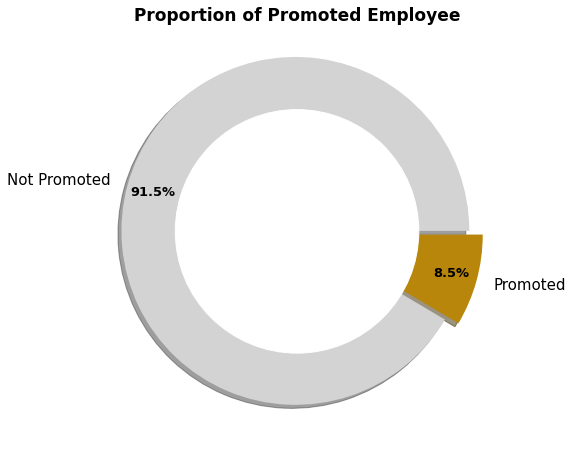

In [44]:
# Showing promoted employee proportion
fig, promotedEmp = plt.subplots()
innerCircle = plt.Circle((0, 0), 0.7, color = "white")

plt.rcParams["figure.figsize"] = (8, 8)
percentage, label, chart = promotedEmp.pie(
        data.groupby("is_promoted").count()["gender"],
        colors = ["lightgrey", "darkgoldenrod"],
        labels = ["Not Promoted", "Promoted"],
        shadow = True,
        textprops = {"size" : 15,"color" : "black", "weight" : "normal"},
        radius = 1,
        autopct = "%1.1f%%",
        labeldistance = 1.1,
        pctdistance = 0.85,
        explode = (.01, 0.07)
       )
plt.gcf().gca().add_artist(innerCircle)
plt.setp(chart, **{"color" : "black", "weight" :"bold", "fontsize" : 13})
plt.title("Proportion of Promoted Employee", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.97)

plt.show()

Chart above shows us a slight proportion of promoted employee. This is make sense since job promotion isn't easy as it looks. The management (HR Department) should consider many aspects of empoloyees before deciding to promote them. Because if not, **company will suffer ineffectiveness of work management**. According to **Kinicki and Fugate (2017) in Haryono et al. (2020)**, job promotion occurs when an employee moves from one job to another, which is higher in payment, **responsibility** and level. It means that if incompetent employee got promoted then there's a big possibility they would struggle in bigger responsibility. As stated before, it can lead to drop of work quality. Therefore, the management should choose employees carefully.

There's no textbook consideration for every company. Even different departments have different formula.Hence, from this data we must find a pattern to be able to predict which employee is worth a promotion. Because if not, the decent employee could feel under - valued and thus lead to demotivation and ends in performance drop. Company could suffer from this (drops in workload an employee can handled, unfulfilled deadline, drops in report quality, etc.).

# Goals

Find which features affecting promotion decision the most and build a model to predict which employee should be promoted. The deployed model later will be useful for **HR Department team**. Thus, questions we want to answer are:
- How does every features affect the decision?
- What model suits our goal the best?
- Why the model suits the best?
- How does the model predict our test data?

# Variables Overview

In [45]:
# Data description
dataDesc = []
for x in data.columns:
    dataDesc.append([
        x,
        data[x].dtypes,
        data[x].isnull().sum(),
        round((((data[x].isnull().sum()) / (len(data))) * 100), 2),
        len(data[x].unique()),
        data[x].drop_duplicates().sample(2).values
    ])

print("Variables description :")
display(pd.DataFrame(data = dataDesc, columns = [
    "Columns Name",
    "Data Type",
    "NULL",
    "NULL Percentage",
    "Unique",
    "Unique Samples"
]))

Variables description :


,Columns Name,Data Type,NULL,NULL Percentage,Unique,Unique Samples
0,employee_id,int64,0,0.00,54808,"[54949, 58698]"
1,department,object,0,0.00,9,"[R&D, HR]"
2,region,object,0,0.00,34,"[region_4, region_30]"
3,education,object,2409,4.40,4,"[nan, Below Secondary]"
4,gender,object,0,0.00,2,"[f, m]"
5,recruitment_channel,object,0,0.00,3,"[other, sourcing]"
6,no_of_trainings,int64,0,0.00,10,"[5, 4]"
7,age,int64,0,0.00,41,"[31, 50]"
8,previous_year_rating,float64,4124,7.52,6,"[4.0, 1.0]"
9,length_of_service,int64,0,0.00,35,"[28, 20]"


We have many missing values in **education** and **previous_year_rating**.

**Handling missing values**

- For education, we will fill them using mode based on others **department, age, and length_of_service**. We will elaborate each variables to see if they have any impact to education.

In [46]:
# Education distribution per departments
print("Education distribution (%) per departments :")
temp = round((pd.crosstab(data["department"], data["education"], normalize = "index") * 100), 1)
temp.columns.name = ""
temp.index.name = "Departments"
display(temp)

Education distribution (%) per departments :


,Bachelor's,Below Secondary,Master's & above
Departments,,,
Analytics,79.3,0.0,20.7
Finance,75.8,4.2,20.0
HR,63.9,5.4,30.7
Legal,78.6,6.3,15.1
Operations,70.0,1.6,28.5
Procurement,62.2,1.8,36.0
R&D,55.8,0.0,44.2
Sales & Marketing,72.7,0.0,27.3
Technology,65.9,2.9,31.2


Each departments required certain educational level, so we shouldn't drop the missing values. Analytics and R&D department for example, they only allow employees with at least bachelor's degree to join. On the other hand, e.g Legal and HR department accept them.

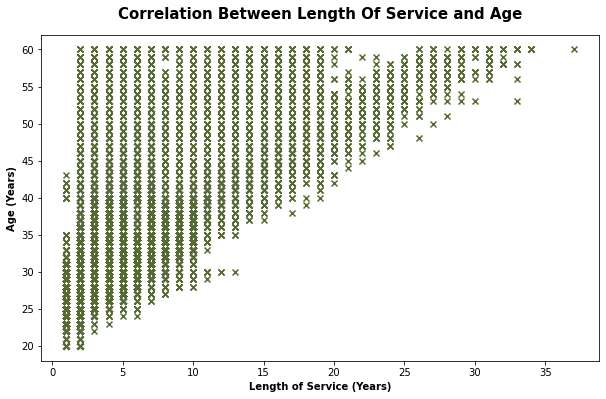

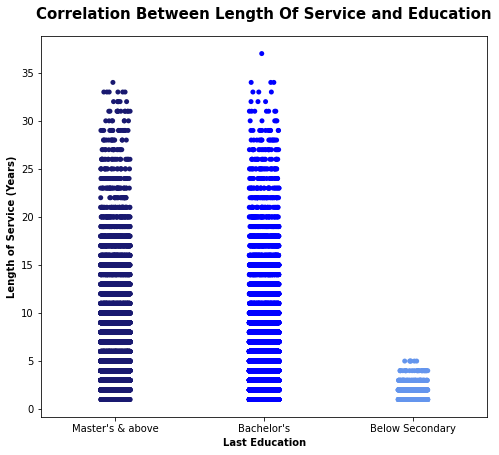

In [47]:
# Correlation between length of service and age
plt.figure(figsize = (10, 6))
plt.scatter(data["length_of_service"], data["age"], color = "darkolivegreen", marker = "x")
plt.title(
        "Correlation Between Length Of Service and Age", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Length of Service (Years)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Age (Years)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )

plt.show()

print("\n")

# Correlation between education and length of serive
plt.figure(figsize = (8, 7))
sns.stripplot(data["education"], data["length_of_service"], jitter = True, palette = ["midnightblue", "blue", "cornflowerblue"])
plt.title(
        "Correlation Between Length Of Service and Education", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Last Education",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Length of Service (Years)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )

plt.show()

Turns out age has a positive correlation with length of serive. So, instead of using age, we can **just use length of service** to determine correlation with eduaction.

The graph above shows us that employees with lower length of service time tend to have lower educational level --vice versa--.

In [48]:
# Filling missing values in education
for x in tqdm_notebook(data[data["education"].isna()].index):
    res = data[(data["department"] == data["department"][x]) & (data["length_of_service"] == data["length_of_service"][x])]["education"].mode()[0]

    data["education"][x] = res

- Meanwhile, for previous year rating we will fill them using mode based on others **KPIs_met >80%, no_of_trainings, awards_won?, and avg_training_score**. We will elaborate each variables to see if they have any impact to previous year rating.

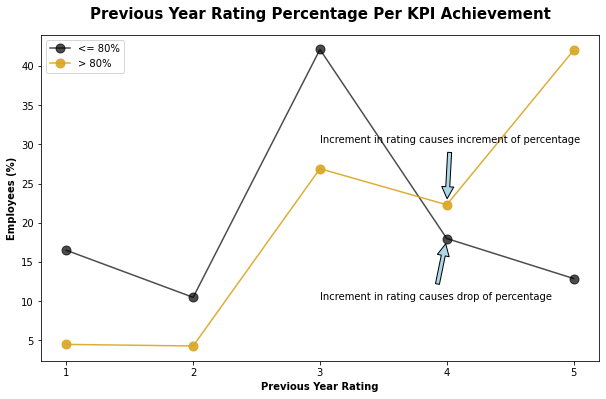

In [49]:
# Correlation between previous year rating and KPI achievement
temp = round((pd.crosstab(data["KPIs_met >80%"], data["previous_year_rating"], normalize = "index") * 100), 1)

plt.figure(figsize = (10, 6))
plt.plot(temp.loc[0], color = "black", alpha = 0.7, marker = "o", markersize = 9)
plt.plot(temp.loc[1], color = "goldenrod", alpha = 0.9, marker = "o", markersize = 9)
plt.title(
        "Previous Year Rating Percentage Per KPI Achievement", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Previous Year Rating",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.legend(("<= 80%", "> 80%"))
plt.xticks((1, 2, 3, 4, 5))
plt.annotate("Increment in rating causes drop of percentage",
            xy = (4, 18),
            xytext = (3, 10),
            fontsize = 10,
            arrowprops = {"facecolor" : "lightblue", "shrink" : 0.1},
            horizontalalignment = "left", verticalalignment = 'bottom')
plt.annotate("Increment in rating causes increment of percentage",
            xy = (4, 22.3),
            xytext = (3, 30),
            fontsize = 10,
            arrowprops = {"facecolor" : "lightblue", "shrink" : 0.1},
            horizontalalignment = "left", verticalalignment = 'bottom')


plt.show()

KPI achievement determines the likelihood of previous year rating. If an employee has KPI above 80%, then there's bigger possibility that he had a high previous year rating compared to those who doesn't. Employees with KPI below 80% centralized on rating 3, meanwhile employees with KPI above 80% have higher percentage of ratingg 4 and 5.

In [50]:
# Correlation between number of trainings and previous year rating
print("Previous year rating percentage per number of trainings :")
temp = round((pd.crosstab(data["previous_year_rating"], data["no_of_trainings"], normalize = "index") * 100), 1)
temp.columns.name = "Number of Trainings"
temp.index = [1, 2, 3, 4, 5]
temp.index.name = "Previous Year Rating (%)"
display(temp)

# Correlation between winning awards and previous year rating
print("\n\nPrevious year rating percentage per achievement in winning awards :")
temp = round((pd.crosstab(data["previous_year_rating"], data["awards_won?"], normalize = "index") * 100), 1)
temp.columns = ["No", "Yes"]
temp.columns.name = "Awards Won?"
temp.index = [1, 2, 3, 4, 5]
temp.index.name = "Previous Year Rating (%)"
display(temp)

Previous year rating percentage per number of trainings :


Number of Trainings,1,2,3,4,5,6,7,8,9,10
Previous Year Rating (%),,,,,,,,,,
1,78.2,15.9,4.1,1.2,0.4,0.2,0.0,0.0,0.0,0.0
2,83.0,12.8,2.9,0.9,0.2,0.0,0.0,0.0,0.0,0.0
3,78.3,16.4,3.9,1.0,0.3,0.1,0.0,0.0,0.0,0.0
4,84.0,12.5,2.6,0.6,0.2,0.1,0.0,0.0,0.0,0.0
5,84.4,12.9,2.3,0.4,0.1,0.0,0.0,0.0,0.0,0.0




Previous year rating percentage per achievement in winning awards :


Awards Won?,No,Yes
Previous Year Rating (%),,
1,98.2,1.8
2,98.3,1.7
3,97.8,2.2
4,97.7,2.3
5,96.9,3.1


Turns out number of trainings doesn't affect previous year rating. Thus we **won't use** this variable. Meanwhile, if an employee won awards in previous time, the probability he gets high previous year rating is higher than those who doesn't. Employees who doesn't won awards are most likely to have low previous year rating.

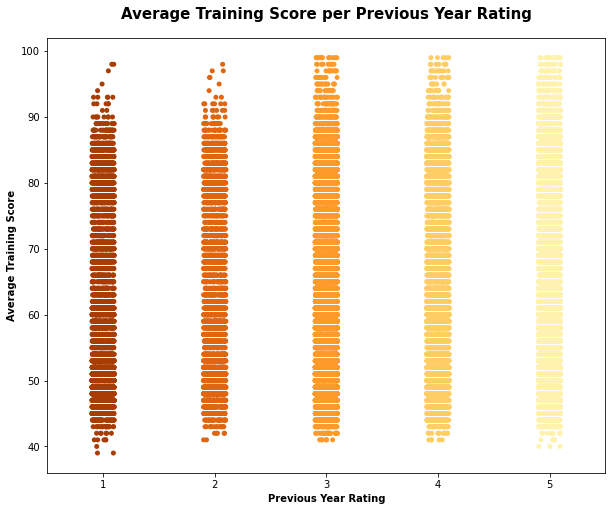

In [51]:
# Correlation between average training score and previous year rating
plt.figure(figsize = (10, 8))
sns.stripplot(data["previous_year_rating"], data["avg_training_score"], jitter = True, palette = "YlOrBr_r")
plt.title(
        "Average Training Score per Previous Year Rating", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Previous Year Rating",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Average Training Score",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.xticks((0, 1, 2, 3, 4), (1, 2, 3, 4, 5))

plt.show()

We can see that higher average training score tends to lead to higher previous year rating.

In [52]:
# Filling missing values in previous_year_rating
# Since the data is small, it's still okay to use indexing
for x in tqdm_notebook(data[data["previous_year_rating"].isna()].index):
    res = data[
          (data["KPIs_met >80%"] == data["KPIs_met >80%"][x])
          & (data["awards_won?"] == data["awards_won?"][x])
          & (data["avg_training_score"] == data["avg_training_score"][x])
          ]["previous_year_rating"].mode()[0]

    data["previous_year_rating"][x] = res

# Distribution, Outliers, and Correlation

In [53]:
# Quantitative report
print("Data report for quantitative variables:")
display(data.describe())

Data report for quantitative variables:


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.355459,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.242746,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


The data looks clean with no common anomaly (no 0 as value in non - categorical variables).

At first glance, we can see that **age** and **length_of_service** has outliers by simply looking on the gap of Q3 and maximum value. To ensure this we will look deeper to those variables and the others.

## Education

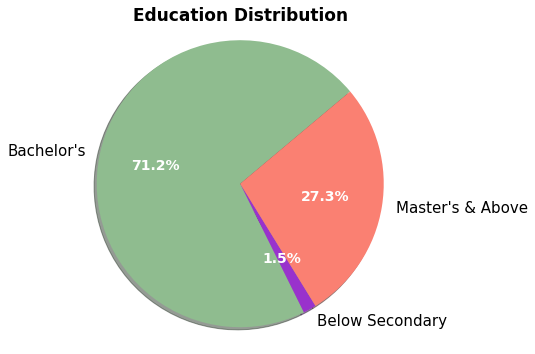

In [54]:
# Distribution
fig, eduDist = plt.subplots(figsize = (8, 6)) # subplots is used to set color, size, and style for percentage and label respectively
percentage, label, chart = eduDist.pie(
        data.groupby("education").count()["age"],
        labels = ["Bachelor's", "Below Secondary", "Master's & Above"],
        autopct = "%1.1f%%",
        startangle = 40,
        colors = ["darkseagreen", "darkorchid", "salmon"],
        textprops = {"size" : 15,"color" : "black"},
        radius = 1.1,
        shadow = True
    )

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 14})
plt.title("Education Distribution", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.98)

plt.show()

Majority of employees have Bachelor's degree but not Master's. Meanwhile, only few of them didn't make it to college.

Percentage of promoted employees per education per department :



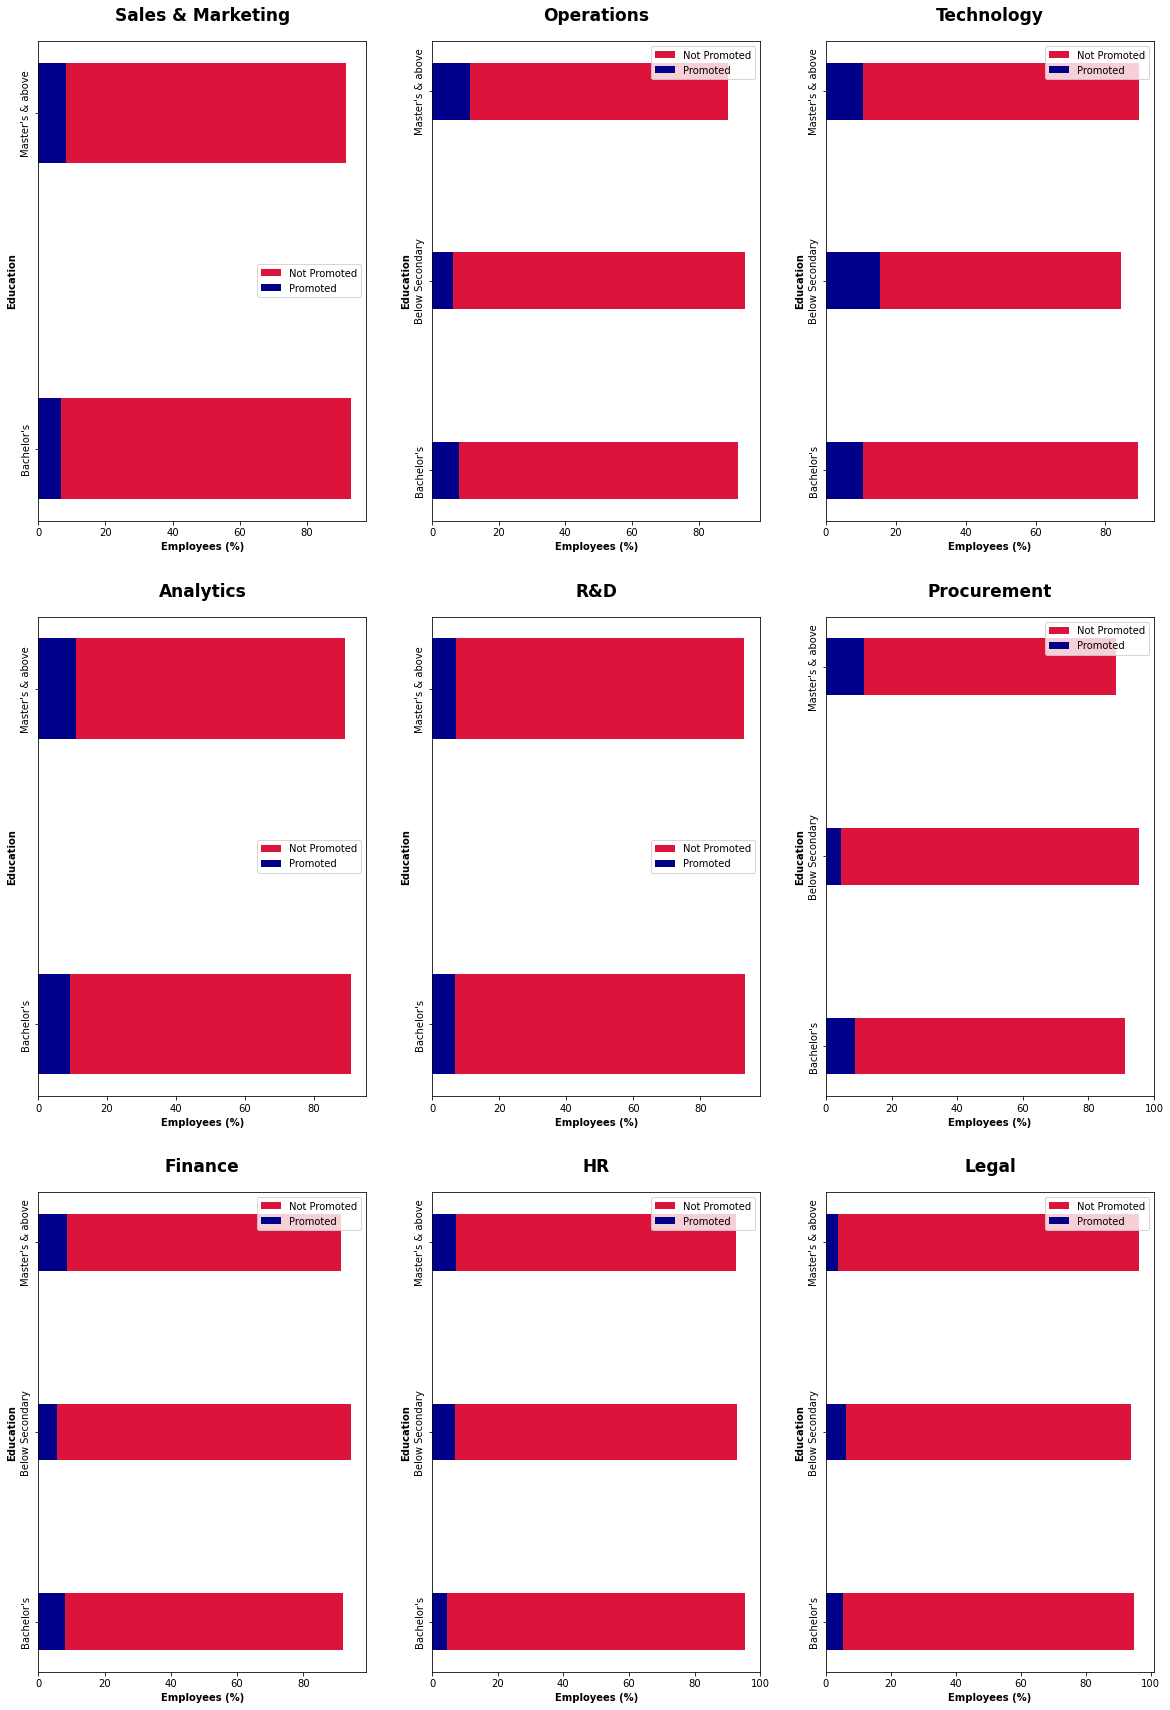

In [55]:
# Correlation between education, department, and job promotion
temp, row, col = round((pd.crosstab([data["department"], data["education"]], data["is_promoted"], normalize = "index") * 100), 1), 0, 0

print("Percentage of promoted employees per education per department :\n")
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 30))
for x in data["department"].unique(): 
    if col > 2:
        col = 0
        row += 1
        
    ax[row][col].barh(temp.loc[x].index, width = temp.loc[x][0], height = 0.3, color = "crimson")
    ax[row][col].barh(temp.loc[x].index, width = temp.loc[x][1], height = 0.3, color = "darkblue")
    ax[row][col].set_title(
    f"{x}", fontdict = {'fontsize': 17,
    'fontweight' : "bold",
    'color' : "black",
    'verticalalignment': 'baseline',
    'horizontalalignment': "center"
    }, y = 1.03)
    ax[row][col].set_xlabel(
        "Employees (%)",
        fontdict = {
            "size" : 10,
            "weight" : "bold"
        }
        )
    ax[row][col].set_ylabel(
        "Education",
        fontdict = {
            "size" : 10,
            "weight" : "bold"
        }
        )
    ax[row][col].legend(("Not Promoted", "Promoted"))
    ax[row][col].set_yticklabels((temp.loc[x].index), rotation = 90, fontdict = {
         'verticalalignment': "center"
    })
    
    col += 1

In [27]:
# Encode education for model purpose later
for i, x in tqdm_notebook(enumerate(data["education"])):
    if x == "Below Secondary":
        data["education"][i] = 0
    elif x == "Bachelor's":
        data["education"][i] = 1
    else:
        data["education"][i] = 2

data["education"] = data["education"].astype(int)

We can see that employee with Master's degree & above has higher chance of being promoted rather than those with lower degree. It means that the higher employee's educational level is, the higher his probability of being promoted. But, this condition doesn't applied in Technology and Legal Department. They give employees with below secondary school grade a higher probability of being promoted. However, we don't see department **significant influence** here even though those two departments broke the pattern.

## Departments

In [58]:
# Distribution
print("Departments distribution :")
temp = data.groupby("department").count()[["gender"]].rename(
    columns = {
        "gender" : "Count"
        }
    )
temp.index.name = "Departments"
display(temp.sort_values("Count", ascending = False))

Departments distribution :


,Count
Departments,
Sales & Marketing,16840
Operations,11348
Procurement,7138
Technology,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


Sales & Marketing has the most employees across all departments. Meanwhile, Legal and R&D are the lowest. It gives us the big picture of company profile. Most likely the company runs as a client - based business with data processing service.

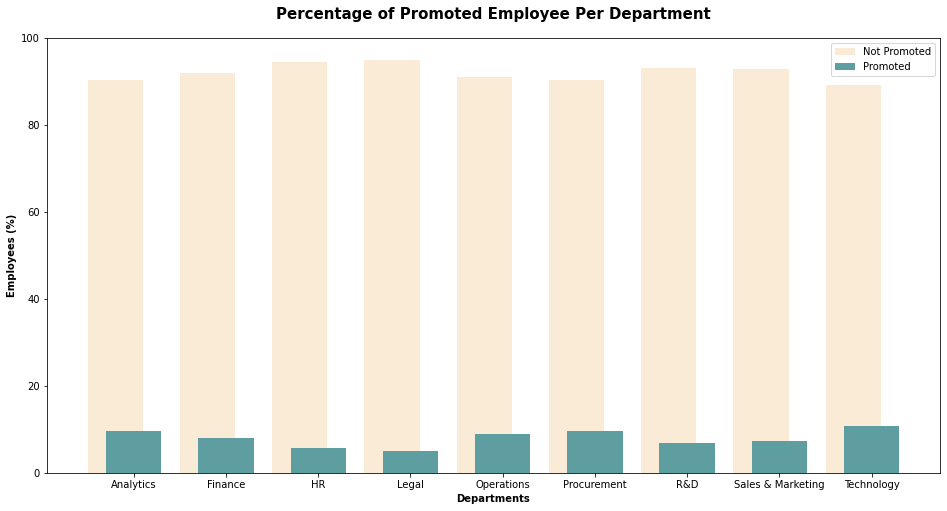

In [274]:
# Correlation between department and job promotion
temp = round((pd.crosstab(data["department"], data["is_promoted"], normalize = "index") * 100), 1)
temp["index"] = [x for x in range(len(temp.index))]

plt.figure(figsize = (16, 8))
plt.bar(temp["index"] - .2, temp[0], color = "antiquewhite", width = 0.6)
plt.bar(temp["index"], temp[1], color = "cadetblue", width = 0.6)
plt.xticks(([x for x in temp["index"]]), ([y for y in temp.index]))
plt.legend(("Not Promoted", "Promoted"))
plt.title(
        "Percentage of Promoted Employee Per Department", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Departments",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylim(0, 100)

plt.show()

There's no department with significant percentage of promoted employees. All departments have quite the same proportion, so we can conlude that departments don't correlate with job promotion decision. Hence we will drop this from our features.

However, we can see that even Sales & Marketing deparment has the most employees, its proportion of promoted employee is still lower than Technology's and Analytics's. This strengthen our assumption that the company runs in data processing service (puts data-related departments on a slight higher concern).

In [275]:
# Removes department
data.drop("department", 1, inplace = True)

## Regions

In [59]:
# Removing "region_" from region to visualize better
data["region"] = data["region"].apply(lambda x : int(x.replace("region_", "")))

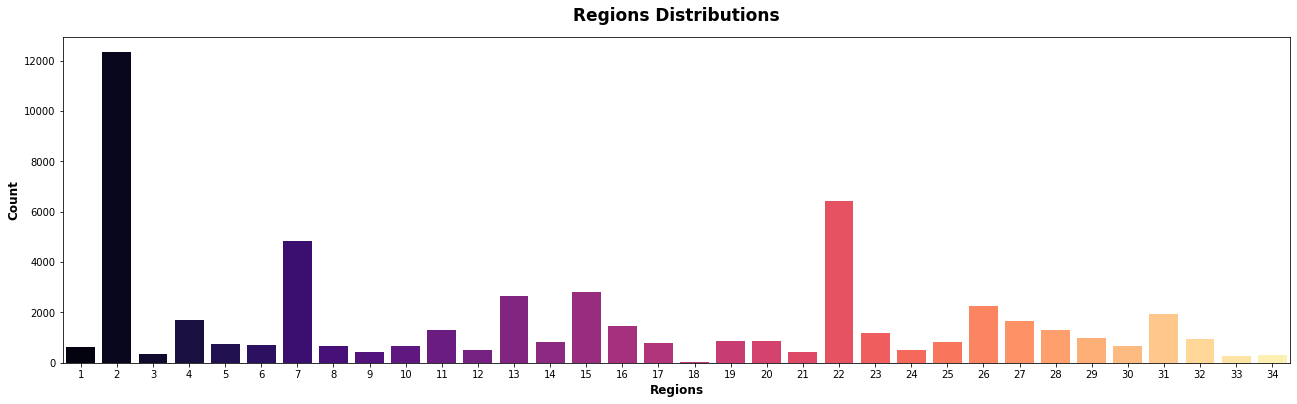

In [277]:
# Distribution
plt.figure(figsize = (22, 6))
sns.countplot(data.sort_values("region")["region"], palette = "magma", saturation = 1.5)
plt.title(
        "Regions Distributions", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Regions",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )

plt.ylabel(
    "Count",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )

plt.show()

Region 2 has the most employees. Most likely the region is the center / main office of the company. On the other hand, Region 18 is the lowest alongwith region 33 and 34. It indicates that these regions are:
- Newly opened or
- Doens't give that much contribution or
- Has few clients or
- Specially designed as hardware / operational warehouse

thus company won't place many employees there.

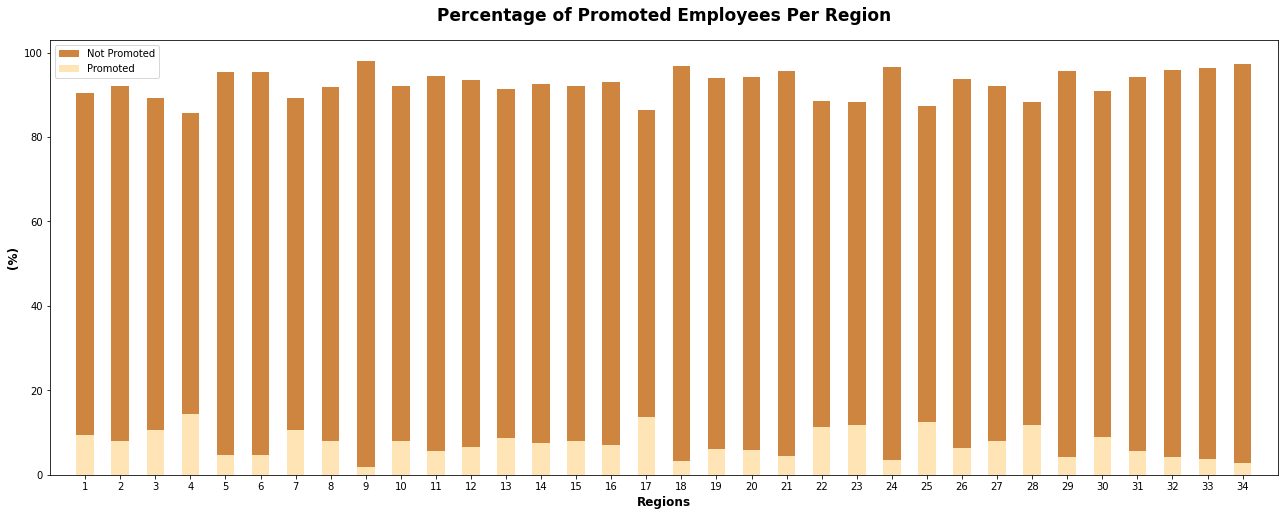

In [278]:
# Correlation between regions and job promotion
plt.figure(figsize = (22, 8))
temp = round((pd.crosstab(data.sort_values("region")["region"], data.sort_values("region")["is_promoted"], normalize = "index") * 100), 1)
plt.bar(temp.index, temp[0], color = "peru", width = 0.5)
plt.bar(temp.index, temp[1], color = "moccasin", width = 0.5)
plt.title(
        "Percentage of Promoted Employees Per Region", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Regions",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.ylabel(
    "(%)",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.xticks(
        ([x for x in range(1, len(data["region"].unique()) + 1)]),
        [x for x in (data.sort_values("region")["region"].unique())])
plt.legend(("Not Promoted", "Promoted"))
plt.xlim(0, 35)

plt.show()

There's no significant high / low percentage across all regions. Besides, this variable doesn't give us any pattern or insight in regards of correlation with job promotion. Hence we remove region from our features.

In [279]:
# Removes region
data.drop("region", 1, inplace = True)

## Gender

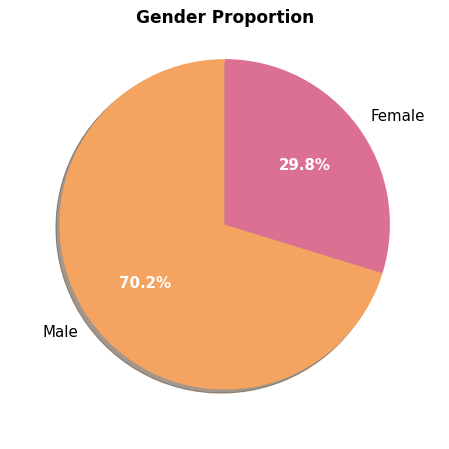

In [280]:
# Visualizing gender proportion
fig, genderProp = plt.subplots()
percentage, label, chart = genderProp.pie(
        data["gender"].value_counts(),
        labels = ["Male", "Female"],
        autopct = "%1.1f%%", startangle = 90,
        colors = ["sandybrown", "palevioletred"],
        textprops = {"size" : 15,"color" : "black"},
        radius = 0.95,
        shadow = True)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 15})
plt.title("Gender Proportion", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.95)

plt.show()

We have quite imbalanced gender here, where male dominate over female.

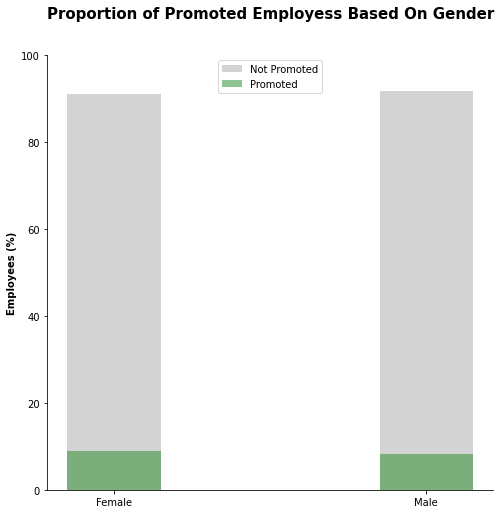

In [281]:
# Correlation between gender and job promotion
genderProp = round((pd.crosstab(data["gender"], data["is_promoted"], normalize = "index") * 100), 1)

fig, ax = plt.subplots(figsize = (8, 8))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.bar(genderProp.index, genderProp[0],
       color = "lightgray",
       width = 0.3,
       linewidth = 1)

plt.bar(genderProp.index, genderProp[1],
       color = "forestgreen",
       width = 0.3,
       alpha = 0.5,
       linewidth = 1)
plt.legend(("Not Promoted", "Promoted"))
plt.title("Proportion of Promoted Employess Based On Gender", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
ax.set_xticklabels(("Female", "Male"))
plt.ylim(0, 100)
plt.legend(("Not Promoted", "Promoted"), loc = 9)

plt.show()

Female has a slight higer percentage of being promoted (0.7% higher than male). However, this is not a significant value. We can say the company still equally promoted employees no matter what their gender is and thus we drop gender from our features.

In [282]:
# Removes gender
data.drop("gender", 1, inplace = True)

## Recruitment Channel

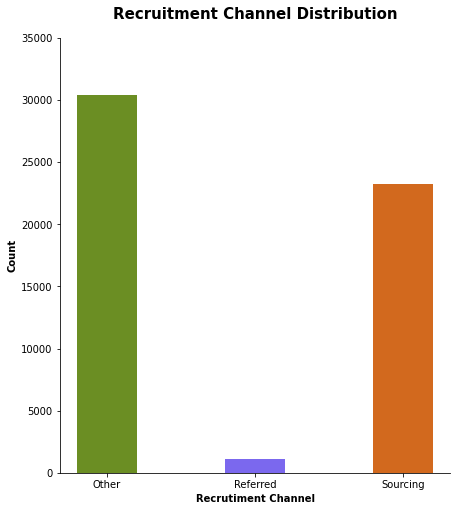

In [283]:
# Distribution
temp = data.groupby("recruitment_channel").count()[["age"]]

fig, ax = plt.subplots(figsize = (7, 8))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.bar(temp.index, temp["age"], color = ["olivedrab", "mediumslateblue", "chocolate"], width = 0.4)
plt.title("Recruitment Channel Distribution", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03)
plt.ylabel(
    "Count",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.xlabel(
    "Recrutiment Channel",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
ax.set_xticklabels(("Other", "Referred", "Sourcing"))
plt.ylim(0, 35000)

plt.show()

It's normal that referred employees number is very low since a success of referencing new employee is determined by the employee (mediator) itself. **Ullman (1996) in Van Hoye (2013)** stated:

>"Employee referrals can be regarded as a specific kind of word-of-mouth communication, with current employees of the recruiting organization acting as the source of interpersonal employment information."

Thus this informal recruitment source / channel is not under the direct control of the organization / company. As a result the employee, who is referencing, will bear two kind of communications, **positive** and **negative** referrals --Van Hoye said it as "word-of-mouth"--. Uncontrollable source of information won't guarantee acceptance rate and hence make this type of recruitment channel unreliable --**in the context of acceptance rate**--. Besides, referral channel needs employees' will to promote and advertise company by their own resource compared to formal resource which has broader coverage. Formal recruitment channel (advertising, job fair, job sites) --**other** in this context-- has higher rate because of its controllable source of information and approach.

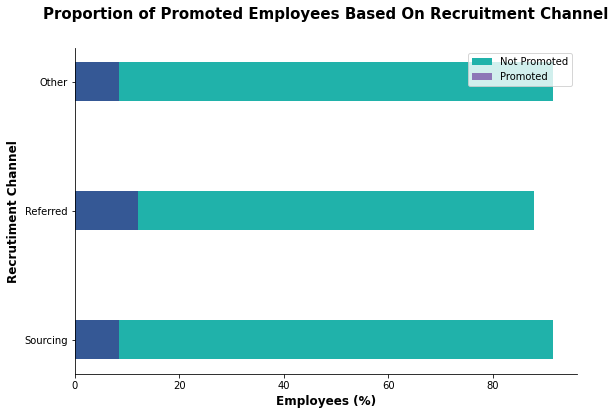

In [284]:
# Correation between recruiment channel and job promotion
recProp = round((pd.crosstab(data["recruitment_channel"], columns = data["is_promoted"], normalize = "index") * 100), 1)

fig, ax = plt.subplots(figsize = (9, 6))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.barh(recProp.index, recProp[0],
       color = "lightseagreen",
       height = 0.3,
       linewidth = 1)

plt.barh(recProp.index, recProp[1],
       color = "indigo",
       height = 0.3,
       alpha = 0.5,
       linewidth = 1)
plt.legend(("Not Promoted", "Promoted"))
plt.title("Proportion of Promoted Employees Based On Recruitment Channel", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.xlabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.ylabel(
    "Recrutiment Channel",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
ax.set_yticklabels(("Sourcing", "Referred", "Other"))

plt.show()

This fact supports **Weller et al. (2009), Williams et al. (1993), and Zottoli & Wanous (2000) findings in Van Hoye (2013)** that stated:

>"...employees recruited through informal sources such as employee referrals show higher job satisfaction, better job performance, and lower turnover than employees recruited through formal sources such as advertising."

This means referral employees are more reliable and have higher probability to develop. So it's not a surprise if they have higher chance to be promoted.

Reference:
- Van Hoye, Greet. 2013. *Recruiting Through Employee Referrals: An Examination of Employees’ Motives*. Belgium : Ghent University dalam Research Gate : Human Performance. Accessed through https://www.researchgate.net/publication/236143006_Recruiting_Through_Employee_Referrals_An_Examination_of_Employees%27_Motives.

## Number of Trainings

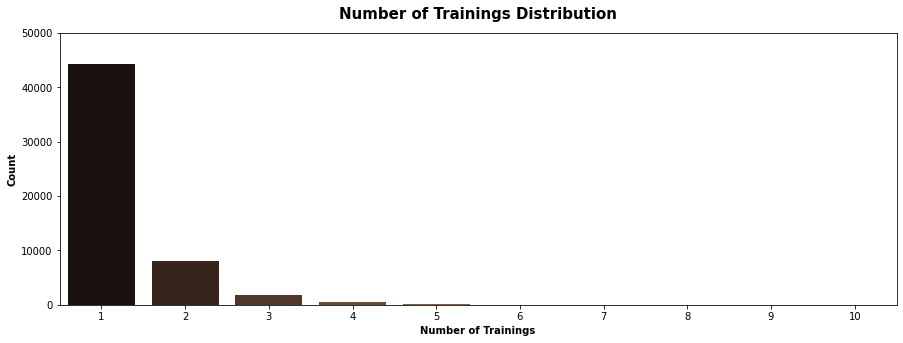

In [285]:
# Distribution
plt.figure(figsize = (15, 5))
sns.countplot(data["no_of_trainings"], palette = "copper")
plt.title("Number of Trainings Distribution", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03)
plt.xlabel(
    "Number of Trainings",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Count",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylim(0, 50000)

plt.show()

Almost all employees had only taken 1 training.

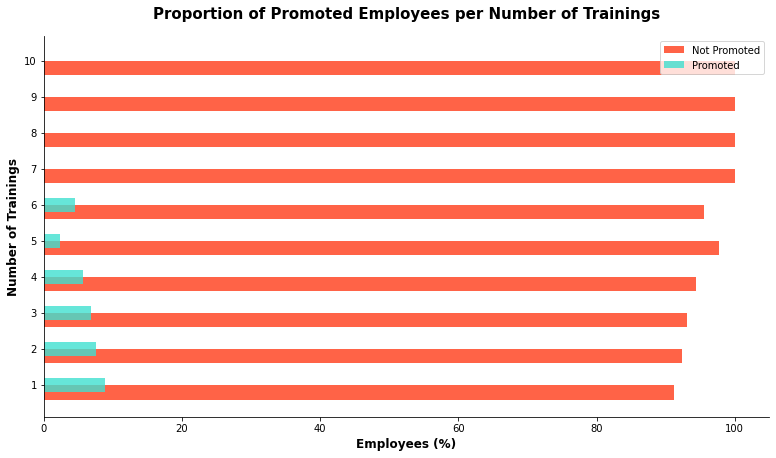

In [286]:
# Correlation between number of trainings and job promotion
trainProp = round((pd.crosstab(data["no_of_trainings"], columns = data["is_promoted"], normalize = "index") * 100), 1)

fig, ax = plt.subplots(figsize = (13, 7))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.barh(trainProp.index - .2, width = trainProp[0],
       color = "tomato",
       height = 0.4,
       linewidth = 1)

plt.barh(trainProp.index, width = trainProp[1],
       color = "turquoise",
       height = 0.4,
       alpha = 0.8,
       linewidth = 1)
plt.legend(("Not Promoted", "Promoted"))
plt.title("Proportion of Promoted Employees per Number of Trainings", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03)
plt.ylabel(
    "Number of Trainings",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.xlabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.yticks(([x for x in range(1, 11)]), ([x for x in trainProp.index]))

plt.show()

Increment in number of trainings causes drop of promoted employees proportion. The only one anomally exist on 5 and 6 trainings, where it slightly increases. It is believed that trainings are given to develop and increase employees'weakness. Therefore, the bad performance employee would get more trainings, whereas good performance employee would get less trainings. Employee who get 6 trainings and above has no chance of being promoted, and it most likely means his performance is very bad.

## Age


Skewness value :  1.01


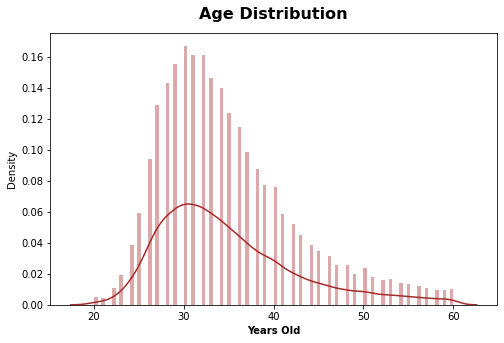

In [204]:
# Distribution
print("\nSkewness value : ", round(skew(data["age"]), 2))

plt.figure(figsize = (8, 5))
sns.distplot(data["age"], bins = 100, color = "brown")
plt.title(
        "Age Distribution",
        fontdict = {"fontsize": 16,
        "fontweight" : "bold",
        "color" : "black",
        "verticalalignment": "baseline",
        "horizontalalignment": "center"
        },
        y = 1.03)
plt.xlabel(
    "Years Old",
    fontdict = {"weight" : "bold"
    })

plt.show()

Age has a moderate positive (right) skewed distribution. It's centralized in young - middle age employees, meanwhile elders are very rare and thus become outliers in the data.

There's not only one method to define outliers. Each of them are useful yet academically debatable, depends on what and who we read and believe in. People commonly use conservative methods such as IQR and "3 times standard deviation from mean range". But, **Leys et al. (2013)** on their article wrote that:

>"Unfortunately, three problems can be identified when using the mean as the central tendency indicator (Miller, 1991). Firstly, it assumes that the distribution is normal (outliers included). Secondly, the mean and standard deviation are strongly impacted by outliers. Thirdly, as stated by Cousineau and Chartier (2010), this method is very unlikely to detect outliers in small samples. Accordingly, this indicator is fundamentally problematic: It is supposed to guide our outlier detection but, at the same time, the indicator itself is altered by the presence of outlying values."

They suggest to use Median Absolute Deviation (MAD) because it is very insensitive to the presence of outliers and also totally immune to the sample size. **Oracle on one of their article** also say the same thing. It is believed more effective than the two methods, but there are several things that we must put on concern:

>"...but it can be too aggressive in classifying values that are not really extremely different. Also, if more than 50% of the data points have the same value, MAD is computed to be 0, so any value different from the residual median is classified as an outlier."

However, MAD method is still fairer in putting "outliers" as the real outliers rather than mean tendency method which is not aware of outliers existence in standard deviation calculation. Moreover, we know our numerical features are vary respectively (except **no_of_trainings**), so no need to worry about MAD aggressive way to define the value.

Thus, from now on we will use MAD to define outliers.

Reference:
- Leys, C. et al. 2013. *Detecting outliers: Do not use standard deviation around the mean, use absolute deviation around the median*. Journal of Experimental Social Psychology. Accessed through http://dx.doi.org/10.1016/j.jesp.2013.03.013.
- Oracle. *Outlier Detection Methods*. Accessed on November, 18th 2020 through https://docs.oracle.com/cd/E17236_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html.

In [205]:
# Defines MAD range
def mad_range(x):
    lower = np.median(x) - (3 * mad(x))
    upper = np.median(x) + (3 * mad(x))
    
    return (lower, upper)

In [206]:
# Showing outliers
outliers = data[(data["age"] < mad_range(data["age"])[0]) | (data["age"] > mad_range(data["age"])[1])]
print("Total outliers : ", len(outliers), "data")
print("Outliers sample :")
display(outliers.sample(10))

Total outliers :  2852 data
Outliers sample :


,employee_id,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
36406,26879,Bachelor's,other,1,59,3.0,15,0,0,66,0
9039,65867,Master's & above,other,1,54,3.0,19,0,0,58,0
52956,48242,Master's & above,other,1,53,3.0,16,1,0,49,0
20725,220,Master's & above,other,1,52,5.0,9,1,0,68,0
36243,67438,Bachelor's,sourcing,1,51,5.0,22,1,0,58,1
16159,71819,Bachelor's,other,1,60,3.0,34,0,0,46,0
44294,45493,Master's & above,other,2,54,4.0,14,0,0,72,0
5386,55173,Master's & above,other,1,59,3.0,12,0,0,79,0
20001,69290,Bachelor's,other,1,51,3.0,11,0,0,68,0
51689,13450,Master's & above,sourcing,1,60,4.0,13,0,0,59,0


**Handling outliers**

We won't drop these outliers for three reasons:
- We don't limit our model based on employees' age. We will build a model that covers all employees no mater how old they are.
- It won't affect our result (only 5.2%).
- These outliers don't differ that much from normal values.
- These outliers are not an error, but natural / organic data.

But, we will create a new feature which is presenting age range. Besides make the model learn easier, this binning technique also removes outliers without actually removes them.

In [60]:
# Binning age to remove outliers and classify the data better.
# Range is set to 3 years because it's the most appropriate number if we put work experience as the determinant.
# 3 years is believed the average year an employee can learn new things fully and thus can be labelled as "experienced employee".
# Just like we usually found on job sites that majority requires minimal of 3 years work experience to sit on "experienced" position.
ageRange, ageRangeInt, ar = [], [], range(data["age"].min(), data["age"].max(), 3)

for a in data["age"]:
    count = -1
    for i, r in enumerate(ar):
        count += 1
        try:
            if (r + count) <= a <= (ar[i + 1] + count):
                ageRange.append(f"{r + count} - {ar[i + 1] + count}")
                ageRangeInt.append(i)
                break
            elif (ar[i + 1] + count + 1) <= a <= (ar[i + 2] + count + 1):
                ageRange.append(f"{ar[i + 1] + count + 1} - {ar[i + 2] + count + 1}")
                ageRangeInt.append(i + 1)
                break
        except:
            ageRange.append(f"> {r + 1}")
            ageRangeInt.append(i + 1)
            break
                
data["ageRange"] = ageRange
data["ageRangeInt"] = ageRangeInt

In [256]:
# New age distribution
print("New distribution :")
temp = round((pd.crosstab(data["ageRange"], columns = "Count (%)", normalize = "columns") * 100), 1)
temp.columns.name = ""
temp.index.name = "Age (Years Old)"
display(temp)

New distribution :


,Count (%)
Age (Years Old),
20 - 23,1.6
24 - 27,12.8
28 - 31,25.1
32 - 35,22.9
36 - 39,15.1
40 - 43,9.3
44 - 47,5.2
48 - 51,3.5
52 - 55,2.4


New distribution with age range still shows the same result, where employees are centralized in 28 - 35 years old.

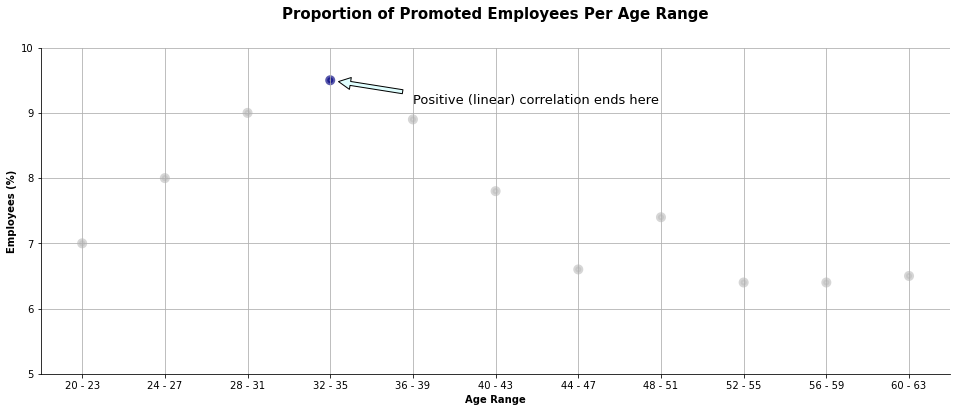

In [209]:
# Correlation between age range and job promotion
ageProp = round((pd.crosstab(data["ageRange"], data["is_promoted"], normalize = "index") * 100), 1)

fig, ax = plt.subplots(figsize = (16.3, 6))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.grid(True)
plt.scatter(ageProp.index, ageProp[1],
            color = ["silver", "silver", "silver", "navy", "silver", "silver", "silver", "silver", "silver", "silver", "silver"],
            linewidths = 4, alpha = 0.65)
plt.annotate("Positive (linear) correlation ends here",
            xy = ("32 - 35", 9.5),
            xytext = ("36 - 39", 9.1),
            fontsize = 13,
            arrowprops = {"facecolor" : "lightcyan", "shrink" : 0.1},
            horizontalalignment = "left", verticalalignment = 'bottom')
plt.title("Proportion of Promoted Employees Per Age Range", size = 15, weight = "bold", y = 1.07)
plt.xlabel("Age Range", size = 10, fontdict = {"weight" : "bold"})
plt.ylabel("Employees (%)", size = 10, fontdict = {"weight" : "bold"})
plt.ylim(5, 10)

plt.show()

32 - 35 years old group has the highest percentage of promoted employees, where the elders has the lowest. The most possible reasons for this phenomenon are:
- Younger employees tend to have short length of service (see **Handling missing values** part), whereas the elders tend to have longer service time. This means younger employees are sitting in low - middle position / level, thus still facing more position levels ahead. The elders on the contrary most likely sit on the middle - high level which is means there's fewer (or even no more) positions ahead. 
- The higher the level / position is, the harder it is to be promoted since it requires more skill (not only practical, but also managerial) and consideration, not to mention politics.

Age range has a positive correlation with job promotion in the scope of 20 - 35 years old. Entering 36 years old the pattern becomes fluid and unpredictable. However, we'll keep this feature since we got significant difference between the elder and the young - medium years old.

In [306]:
# Removes age since we already have ageRange
data.drop(["age"], 1, inplace = True)

## Previous Year Rating

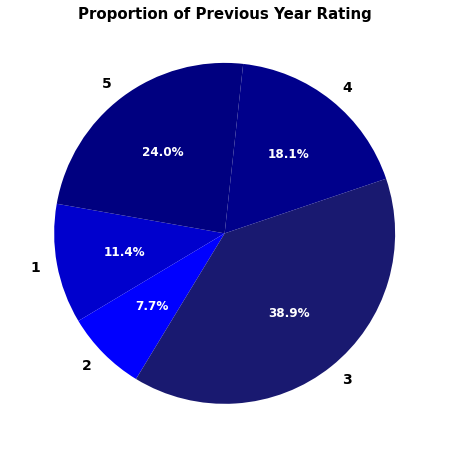

In [212]:
# Distribution
temp = pd.crosstab(data["previous_year_rating"], columns = "count", normalize = "columns")
fig, ratProp = plt.subplots()
percentage, label, chart = ratProp.pie(
        temp["count"],
        labels = [1, 2, 3, 4, 5],
        autopct = "%1.1f%%",
        startangle = 170,
        colors = ["mediumblue", "blue", "midnightblue", "darkblue", "navy"],
        textprops = {"size" : 14,"color" : "black", "weight" : "bold"},
        radius = 0.98)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 12})
plt.title("Proportion of Previous Year Rating", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.98)

plt.show()

Most of the employess got mediocre rating last year, where almost a quarter of them got the best rating. This bring us a conclusion that company's last year performance was quite good.

In [213]:
# Correlation between previous year rating and job promotion
temp = round((pd.crosstab(data["previous_year_rating"], data["is_promoted"], normalize = "index") * 100), 1)
temp.columns.name = ""
temp.columns = ["Not Promoted (%)", "Promoted (%)"]
temp.index.name = "Previous Year Rating"
print("Proportion of promoted employees based on previous year rating :")
display(temp)

Proportion of promoted employees based on previous year rating :


,Not Promoted (%),Promoted (%)
Previous Year Rating,,
1.0,98.6,1.4
2.0,95.7,4.3
3.0,93.2,6.8
4.0,92.0,8.0
5.0,83.6,16.4


There's a strong correlation between them (positive / linear correlation). Increment in previous year rating shows significant increment in promoted employees percentage. This means employee with higher previous year rating has higher chance to be promoted compared to those with lower rating.

## Length of Service


Skewness value :  1.74


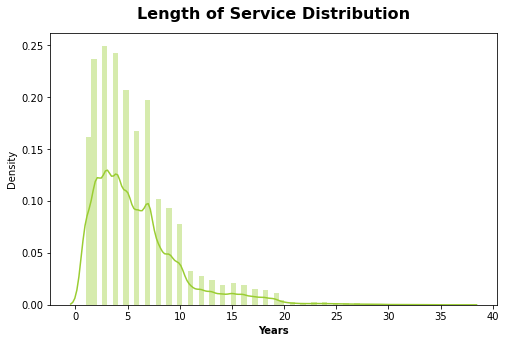

In [214]:
# Distribution
print("\nSkewness value : ", round(skew(data["length_of_service"]), 2))

plt.figure(figsize = (8, 5))
sns.distplot(data["length_of_service"], bins = 70, color = "yellowgreen")
plt.title(
        "Length of Service Distribution",
        fontdict = {"fontsize": 16,
        "fontweight" : "bold",
        "color" : "black",
        "verticalalignment": "baseline",
        "horizontalalignment": "center"
        },
        y = 1.03)
plt.xlabel(
    "Years",
    fontdict = {"weight" : "bold"
    })

plt.show()

This variables has a severe positive (right) skewed distribution. Employees are centralized on low - medium length of service. Loyal and senior employees on the other hand are very low.

In [215]:
# Showing outliers
outliers = data[(data["length_of_service"] < mad_range(data["length_of_service"])[0]) | (data["length_of_service"] > mad_range(data["length_of_service"])[1])]
print("Total outliers : ", len(outliers), "data")
print("Outliers sample :")
display(outliers.sample(10))

Total outliers :  3489 data
Outliers sample :


,employee_id,education,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
35570,43894,Bachelor's,other,1,4.0,27,0,0,88,0
16371,36056,Master's & above,other,1,3.0,14,0,0,49,0
45745,14083,Master's & above,other,1,1.0,20,0,0,46,0
46650,13897,Bachelor's,other,1,4.0,15,0,0,60,0
12213,12338,Master's & above,sourcing,1,3.0,17,0,0,71,0
41738,74331,Master's & above,other,1,4.0,14,1,0,80,0
41317,22266,Master's & above,other,1,3.0,14,1,0,65,0
7974,26694,Master's & above,other,1,3.0,15,1,0,59,1
40474,2646,Master's & above,other,1,3.0,18,0,0,62,0
41768,41665,Bachelor's,other,1,5.0,21,1,0,54,0


**Handling outliers**

Just like age, we won't drop these outliers. Approach taken also follows what've done before.

In [61]:
# Binning length of service to remove outliers and classify the data better
# We want to divide it into 3 categories: very short, short, medium, long, and very long service time
# Thus, the years range follows the categories splitting, which is divided by 3
serviceRange, serviceRangeInt, sr = [], [], [y for y in range(data["length_of_service"].min(), data["length_of_service"].max(), math.floor(data["length_of_service"].max() / 5))]

for x in data["length_of_service"]:
    if sr[0] <= x <= sr[1]:
        serviceRange.append("Very Short")
        serviceRangeInt.append(0)
    elif sr[1] + 1 <= x <= sr[2]:
        serviceRange.append("Short")
        serviceRangeInt.append(1)
    elif sr[2] + 1 <= x <= sr[3]:
        serviceRange.append("Medium")
        serviceRangeInt.append(2)
    elif sr[3] + 1 <= x <= sr[4]:
        serviceRange.append("Long")
        serviceRangeInt.append(3)
    else:
        serviceRange.append("Very Long")
        serviceRangeInt.append(4)

data["serviceRange"] = serviceRange
data["serviceRangeInt"] = serviceRangeInt

In [316]:
# New length of service distribution
print("New distribution :")
        
temp = round((pd.crosstab(data["serviceRangeInt"], columns = "Count (%)", normalize = "columns") * 100), 1)
temp.columns.name = ""
temp.index = ["Very Short", "Short", "Medium", "Long", "Very Long"]
temp.index.name = "Length of Service (Years)"
display(temp)

New distribution :


,Count (%)
Length of Service (Years),
Very Short,80.5
Short,15.3
Medium,3.6
Long,0.6
Very Long,0.1


This new feature shows us different result. If before we stated employees are centralized in low - medium service time, the new range tells us that majority of employees are quite new. Loyal and senior employees on the other hand are very rare. The percentage also indicates a high turnover.

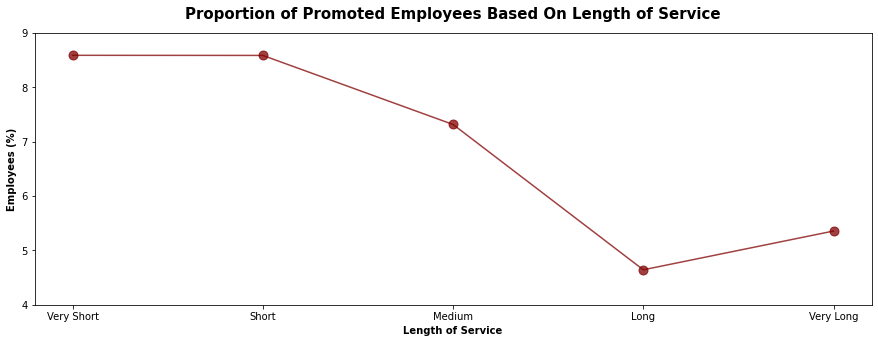

In [318]:
# Correlation between service range and job promotion
temp = pd.crosstab(data["serviceRangeInt"], data["is_promoted"], normalize = "index") * 100

plt.figure(figsize = (15, 5))
plt.plot(temp[1], color = "maroon", alpha = 0.75, marker = "o", markersize = 9)
plt.title(
        "Proportion of Promoted Employees Based On Length of Service", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Length of Service",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.xticks((0, 1, 2, 3, 4), ("Very Short", "Short", "Medium", "Long", "Very Long"))
plt.ylim(4, 9)

plt.show()

Because of linear correlation between **age** and **length_of_service**, this finding also correlates with age's (refer to explanation on "age"). Employees with shorter length of service has a higher chance of being promoted.

## KPIs Achievement

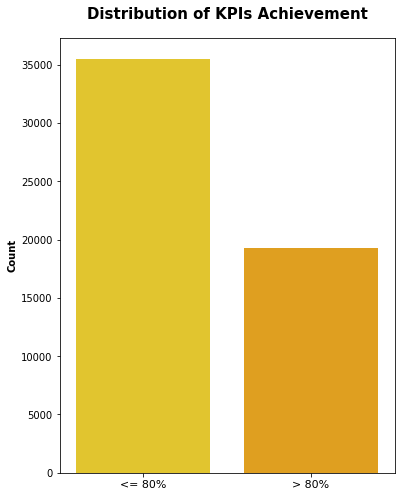

In [219]:
# Distribution
fig, ax = plt.subplots(figsize = (6, 8))
sns.countplot(data["KPIs_met >80%"], palette = "Wistia")
plt.title(
        "Distribution of KPIs Achievement", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel("")
plt.ylabel(
    "Count",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
ax.set_xticklabels(("<= 80%", "> 80%"), fontdict = {"size" : 11})

plt.show()

Only a few employees had brilliant KPIs score.

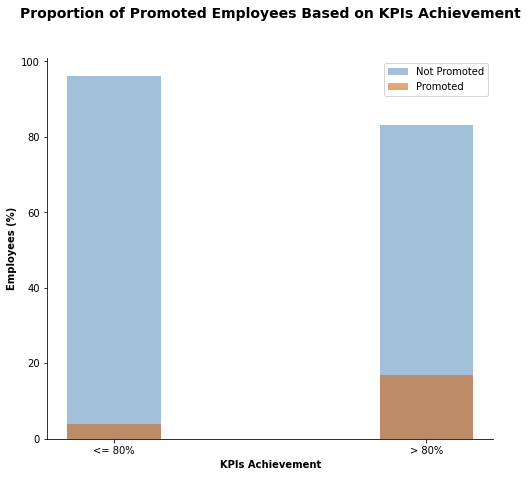

In [220]:
# Correlation between KPIs achievement and job promotion
temp = (pd.crosstab(data["KPIs_met >80%"], data["is_promoted"], normalize = "index") * 100)
temp.index = ["<= 80%", "> 80%"]

fig, ax = plt.subplots(figsize = (8, 7))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.bar(temp.index, temp[0],
       color = "steelblue",
       alpha = 0.5,
       width = 0.3,
       linewidth = 1)

plt.bar(temp.index, temp[1],
       color = "chocolate",
       width = 0.3,
       alpha = 0.6,
       linewidth = 1)
plt.legend(("Not Promoted", "Promoted"))
plt.title("Proportion of Promoted Employees Based on KPIs Achievement", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.09)
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.xlabel(
    "KPIs Achievement",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )

plt.show()

Employees with KPIs score above 80% has a higher chance of being promoted. This is make sense since KPI indicates employee's performance during certain time and also acts as performance report for the management. Company of course prefer a good performance employee to be entrusted bigger responsibility.

## Winning Awards

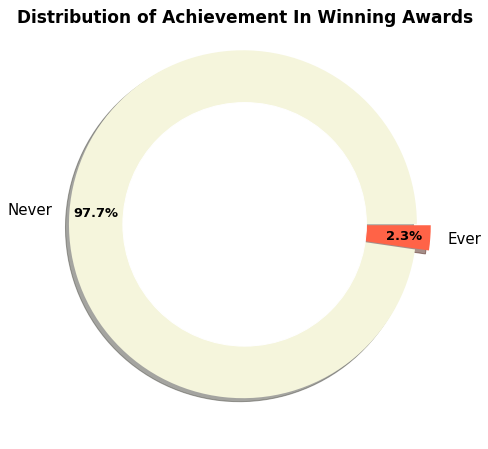

In [221]:
# Distribution
fig, awdProp = plt.subplots()
innerCircle = plt.Circle((0, 0), 0.7, color = "white")

plt.rcParams["figure.figsize"] = (8, 8)
percentage, label, chart = awdProp.pie(
        data.groupby("awards_won?").count()["education"],
        colors = ["beige", "tomato"],
        labels = ["Never", "Ever"],
        shadow = True,
        textprops = {"size" : 15,"color" : "black", "weight" : "normal"},
        radius = 1,
        autopct = "%1.1f%%",
        labeldistance = 1.1,
        pctdistance = 0.85,
        explode = (.01, 0.07)
       )
plt.gcf().gca().add_artist(innerCircle)
plt.setp(chart, **{"color" : "black", "weight" :"bold", "fontsize" : 13})
plt.title("Distribution of Achievement In Winning Awards", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.95)

plt.show()

Almost all employees never won awards before.

In [222]:
# Correlation between winning awards and job promotion
print("Proportion of promoted employees per awards achievement :")
temp = round((pd.crosstab(data["awards_won?"], data["is_promoted"], normalize = "index") * 100), 1).rename(columns = {
    0 : "Not Promoted", 1 : "Promoted"
})
temp.columns.name = ""
temp.index.name = "Awards Won?"
temp.index = ["Never", "Ever"]
display(temp)

Proportion of promoted employees per awards achievement :


,Not Promoted,Promoted
Never,92.3,7.7
Ever,56.0,44.0


Turns out winning awards give a big impact of promotion decision. Almost half of employees who have won awards get promoted. If they never won, then there's only a very small chance of getting promoted.

## Average Training Score


Skewness value :  0.45


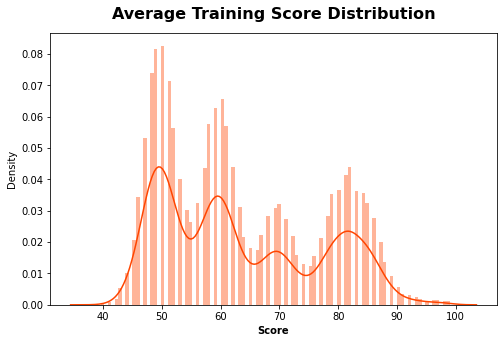

In [223]:
# Distribution
print("\nSkewness value : ", round(skew(data["avg_training_score"]), 2))

plt.figure(figsize = (8, 5))
sns.distplot(data["avg_training_score"], bins = 100, color = "orangered")
plt.title(
        "Average Training Score Distribution",
        fontdict = {"fontsize": 16,
        "fontweight" : "bold",
        "color" : "black",
        "verticalalignment": "baseline",
        "horizontalalignment": "center"
        },
        y = 1.03)
plt.xlabel(
    "Score",
    fontdict = {"weight" : "bold"
    })

plt.show()

The distribution forms a multimodal, but has a normal skewness value. This means average training score distributed unevenly, especially in the middle range. Increment in average training score tends to lead into drops of total employees.

In [224]:
# Showing outliers
outliers = data[(data["avg_training_score"] < mad_range(data["avg_training_score"])[0]) | (data["avg_training_score"] > mad_range(data["avg_training_score"])[1])]
print("Total outliers : ", len(outliers), "data")

Total outliers :  0 data


No outliers were found.

In [62]:
# Binning average training score into 3 categories to maximize the model later
tScoreRange, tr = [], range(data["avg_training_score"].min(), data["avg_training_score"].max(), int(data["avg_training_score"].max() / 4))

for z in data["avg_training_score"]:
    if tr[0] <= z <= tr[1]:
        tScoreRange.append(0)
    elif tr[1] + 1 <= z <= tr[2]:
        tScoreRange.append(1)
    else:
        tScoreRange.append(2)

data["avgTrainEncode"] = tScoreRange

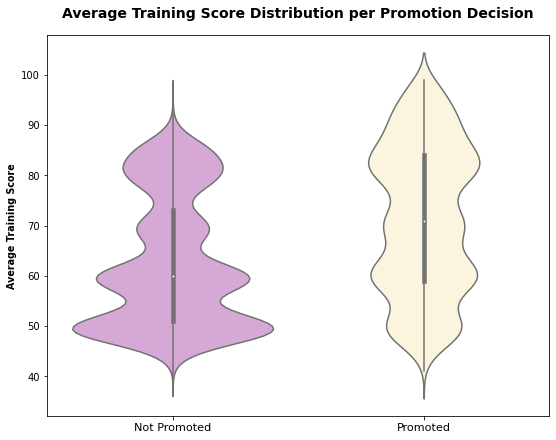

In [225]:
# Correlation between average training score and job promotion
fig, ax = plt.subplots(figsize = (9, 7))
sns.violinplot(data["is_promoted"], data["avg_training_score"], palette = ["plum", "cornsilk"])
plt.title("Average Training Score Distribution per Promotion Decision", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03)
plt.ylabel(
    "Average Training Score",
    fontdict = {
        "weight" : "bold",
        "size" : 9.6
    }
    )
plt.xlabel(
    "")
ax.set_xticklabels(("Not Promoted", "Promoted"), fontdict = {"size" : 11.3})


plt.show()

Higher average training score could guarantee an employee to be promoted rather than lower score. This can be seen from the section starting on 85 and above, which is wider in promoted employees group. Meanwhile there's **very high** probability to be not promoted if an employee got a very low score.

# Modelling

## Pre - Processing

### One Hot Encoding
The only one feature left that hasn't been encoded is recruiment channel. Since it doesn't have an order, it has to use One Hot Encoder.

In [324]:
# Encode recruitment channel
data = pd.get_dummies(data = data, columns = ["recruitment_channel"])

In [326]:
# Removes unnecessary columns
data.drop(["employee_id", "length_of_service", "avg_training_score", "ageRange", "serviceRange"], 1, inplace = True)

### Target Proportion

In [328]:
print("Proportion :")
temp = round((pd.crosstab(data["is_promoted"], columns = "Count (%)", normalize = "columns") * 100), 1)
temp.columns.name = ""
temp.index.name = "Promotion Decision"
temp.index = ["Not Promoted", "Promoted"]
display(temp)

Proportion :


,Count (%)
Not Promoted,91.5
Promoted,8.5


As stated in the beginning, this dataset is **very imbalance**. We only have 8,5% of promoted employees, and that's not gonna be enough for the machine. Hence, we must handle it. 

**Handling imbalanced data**

We will use 3 approaches:
- Using **specific weight** parameter
- Random Over Sampling
- SMOTE

On each algorithm, we will try to apply each approach (weight parameter is exception for certain algorithms) and see which approach generates the best result.

**WEIGHT PARAMETER APPROACH WILL BE USED IN TUNED MODEL SECTION**

In [81]:
data = pd.read_csv(r"C:\Users\Ezra\Documents\PURWADHIKA\Final Project\modelfeatures.csv")

In [89]:
# Splitting Data
X = data.drop("is_promoted", 1)
y = data["is_promoted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 7)

In [91]:
# Random Over Sampling
trainData = pd.concat([X_train, y_train], axis = 1)
notPromoted, promoted = trainData[trainData["is_promoted"] == 0], trainData[trainData["is_promoted"] == 1]
promoted = resample(promoted, replace = True, n_samples = len(notPromoted), random_state = 7)
dataROS = pd.concat([notPromoted, promoted])
X_train_ROS, y_train_ROS = dataROS.drop("is_promoted", 1), dataROS["is_promoted"]

print("Oversampled data :")
temp = round((pd.crosstab(dataROS["is_promoted"], columns = "Count (%)", normalize = "columns") * 100), 1)
temp.columns.name = ""
temp.index.name = "Promotion Decision"
temp.index = ["Not Promoted", "Promoted"]
display(temp)

Oversampled data :


,Count (%)
Not Promoted,50.0
Promoted,50.0


In [90]:
# SMOTE
X_train_SMOTE, y_train_SMOTE = SMOTE(random_state = 7).fit_sample(X_train, y_train)

print("SMOTE data :")
temp = Counter(y_train_SMOTE)
temp = pd.DataFrame([(temp[0] / (temp[0] + temp[1])) * 100, (temp[1] / (temp[0] + temp[1])) * 100], columns = ["Count (%)"], index = ["Not Promoted", "Promoted"])
temp.index.name = "Promotion Decision"
display(temp)

SMOTE data :


,Count (%)
Promotion Decision,
Not Promoted,50.0
Promoted,50.0


In [70]:
# For plotting purpose
def plotConMat(name, model, trainX, testX, trainy, testy):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 6))
  
    conMat = plot_confusion_matrix(model, trainX, trainy, cmap = "YlOrRd", values_format = "g", ax = ax[0], normalize = "true")
    conMat.ax_.set_yticklabels(
      ("Not Promoted", "Promoted"),
      fontdict = {
          "verticalalignment": "center",
          "rotation" : 90
          }
        )
    ax[0].set_xticklabels(
      ("Not Promoted", "Promoted"),
      fontdict = {
          "horizontalalignment": "center",
          }
        )
    ax[0].set_xlabel(
      "Predicted Label",
      fontdict = {
          "weight" : "bold"
          }
        )
    ax[0].set_ylabel(
      "True Label",
      fontdict = {
          "weight" : "bold"
          }
        )
    conMat.ax_.set_title(
      name + " Confusion Matrix (Train)",
      fontdict = {
          "weight" : "bold",
          "size" : 14,
          "horizontalalignment" : "center"
          }, y = 1.05)

    conMat = plot_confusion_matrix(model, testX, testy, cmap = "YlOrRd", values_format = "g", ax = ax[1], normalize = "true")
    conMat.ax_.set_yticklabels(
      ("Not Promoted", "Promoted"),
      fontdict = {
          "verticalalignment": "center",
          "rotation" : 90
          }
        )
    ax[1].set_xticklabels(
      ("Not Promoted", "Promoted"),
      fontdict = {
          "horizontalalignment": "center",
          }
        )
    ax[1].set_xlabel(
      "Predicted Label",
      fontdict = {
          "weight" : "bold"
          }
        )
    ax[1].set_ylabel(
      "True Label",
      fontdict = {
          "weight" : "bold"
          }
        )
    conMat.ax_.set_title(
      name + " Confusion Matrix (Test)",
      fontdict = {
          "weight" : "bold",
          "size" : 14,
          "horizontalalignment" : "center"
          }, y = 1.05)

    plt.tight_layout(pad = 8)
    plt.show()  

## Base Model
Base Model is used for brief overview of algorithms' capability and performance in predicting the data.

### Random Forest Classifier

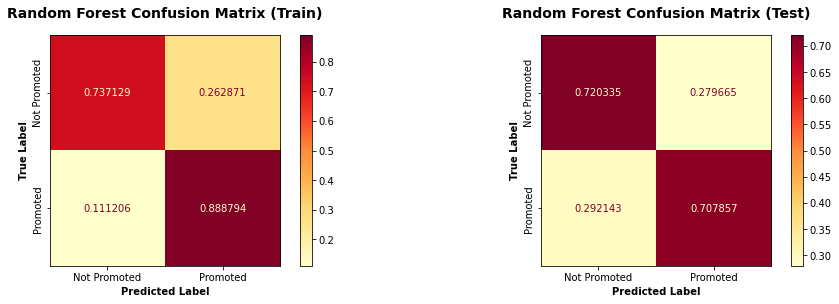


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.89922,0.768936


In [334]:
# Using oversampled data
RanFor = RandomForestClassifier().fit(X_train_ROS, y_train_ROS)
RF_OStrainProbs = RanFor.predict_proba(X_train_ROS)[:, 1]
RF_OStestProbs = RanFor.predict_proba(X_test)[:, 1]
plotConMat("Random Forest", RanFor, X_train_ROS, X_test, y_train_ROS, y_test)

print("\nROC AUC score :")
baseModelScore = pd.DataFrame({"Train" : roc_auc_score(y_train_ROS, RF_OStrainProbs), "Test" : roc_auc_score(y_test, RF_OStestProbs)}, index = ["Base Random Forest ROS"])
display(baseModelScore)

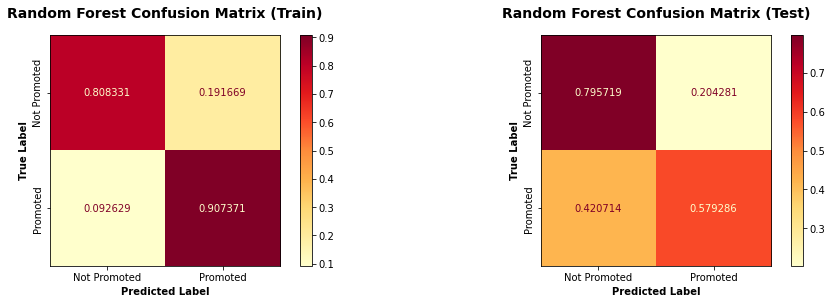


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.899220,0.768936
Base Random Forest SMOTE,0.942121,0.764139


In [335]:
# Using SMOTE data
RanFor = RandomForestClassifier().fit(X_train_SMOTE, y_train_SMOTE)
RF_SMOTEtrainProbs = RanFor.predict_proba(X_train_SMOTE)[:, 1]
RF_SMOTEtestProbs = RanFor.predict_proba(X_test)[:, 1]
plotConMat("Random Forest", RanFor, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

print("\nROC AUC score :")
baseModelScore.loc["Base Random Forest SMOTE"] = [roc_auc_score(y_train_SMOTE, RF_SMOTEtrainProbs), roc_auc_score(y_test, RF_SMOTEtestProbs)]
display(baseModelScore)

**In this context, neither FN nor FP is more important than each other. Both of them are important to the company. If the machine suggests HR team to not promote a decent employee (FN), then there's 3 possible scenarios that could happen:**
- Loss of talent opportunity. Management fails to find someone that they could rely on bigger responsibility and workload.
- As a result, work performance and motivation of the decent employee decreases (refer to **business problem section**).
- Drops of monthly (or weekly) workload that the decent employee could handle and also the work results could lead to loss of profit. As stated before, this company is most likely a client-based company. Imagine if decent employee(s) aren't motivated anymore because of not getting promoted for certain time, then reports or projects that they supposed to handle will neglected. Deadline wouldn't be met, clients trust and satisfaction will decrease, and in the end they lower the number of requests (lower income for the company).

**On the other hand, if the machine suggests HR team to promote an inappropriate employee (FP), then there's a chance the company would suffer:**
- Lack of bigger responsibility because actually he isn't ready yet to sit on a higher level. Lack of coordination and supervision could happen.
- As a result, there's a chance of ineffectiveness in work performance. The inappropriate employee sure can learn and develop along the given time. He can increase his practical and non practical skill slowly. Haryono (2013) and other reasearcher in it also say so, where promoted employee (either he is decent or not) will gain more motivation and satisfaction. But still, as long as the management can limit and reduce the learning time, it's better for them to promote a ready and fit employee. Therefore, they will get time and performance effectiveness at the same time.

One of evaluation approach that we can use is **ROC AUC**. This evaluation metrics calculate how good our model is in distinguishing one class from another. The key of this metrics are **TPR** and **FPR**, which met our requirement. TPR itself indicates how many **decent employees that are predicted to be promoted**. The higher **FN (decent employees are predicted to be not promoted) score is, the lower TPR score will be**. Thus, we want TPR score as high as possible. Meanwhile, FPR indicates **how many inappropriate employees that are predicted to be promoted**. The higher **TN (inappropriate employees are predicted to be not promoted) score is, the lower FPR score will be**. Thus, we want FPR score as low as possible. As a result, ROC AUC will provide a better balance of the two classes prediction, and that's exactly what we want.

**PLEASE NOTE THAT THE CONFUSION MATRIX IS NORMALIZED TO ROW / TRUE**

SMOTE delivers better train result, where FP percentage decreases for both train and test data compared to ROS did. On the other hand, SMOTE's FN score in test data increases quite significant, and it's very dangerous since it's neraly a half of the true promoted class. Besides, its FN and FP percentage doesn't balance. On one side, it's good to suppress failure in promoting inappropriate employees. But, if we fail **even higher** to promote decent employees, then we wouldn't get the harmony. ROS on the other hand delivers more balance error rate percentage. It also has a lower difference between ROC AUC train and test score and thus make it more **perfectly fit (even though it's still overfit)** rather than SMOTE.

### Logistic Regression

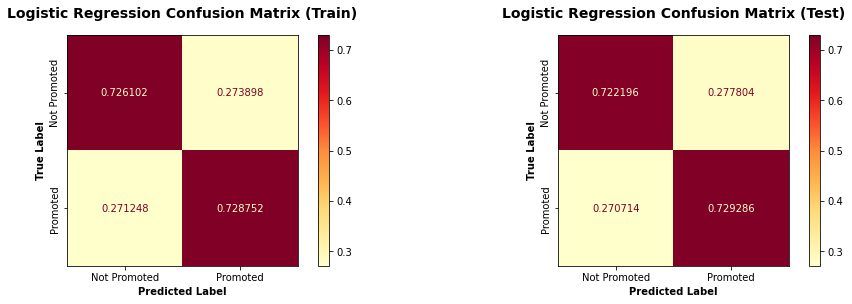


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.899220,0.768936
Base Random Forest SMOTE,0.942121,0.764139
Base Logistic Regression ROS,0.810626,0.805704


In [336]:
# Using oversampled data
LogReg = LogisticRegression().fit(X_train_ROS, y_train_ROS)
LG_OStrainProbs = LogReg.predict_proba(X_train_ROS)[:, 1]
LG_OStestProbs = LogReg.predict_proba(X_test)[:, 1]
plotConMat("Logistic Regression", LogReg, X_train_ROS, X_test, y_train_ROS, y_test)

print("\nROC AUC score :")
baseModelScore.loc["Base Logistic Regression ROS"] = [roc_auc_score(y_train_ROS, LG_OStrainProbs), roc_auc_score(y_test, LG_OStestProbs)]
display(baseModelScore)

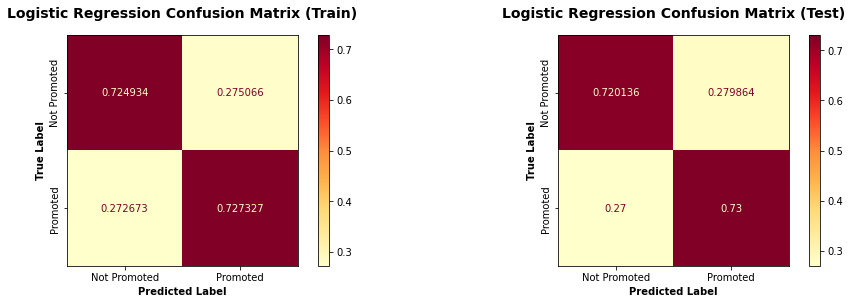


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.899220,0.768936
Base Random Forest SMOTE,0.942121,0.764139
Base Logistic Regression ROS,0.810626,0.805704
Base Logistic Regression SMOTE,0.810605,0.804885


In [337]:
# Using SMOTE data
LogReg = LogisticRegression().fit(X_train_SMOTE, y_train_SMOTE)
LG_SMOTEtrainProbs = LogReg.predict_proba(X_train_SMOTE)[:, 1]
LG_SMOTEtestProbs = LogReg.predict_proba(X_test)[:, 1]
plotConMat("Logistic Regression", LogReg, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

print("\nROC AUC score :")
baseModelScore.loc["Base Logistic Regression SMOTE"] = [roc_auc_score(y_train_SMOTE, LG_SMOTEtrainProbs), roc_auc_score(y_test, LG_SMOTEtestProbs)]
display(baseModelScore)

SMOTE provides a better results, where FN is slightly decreases from ROS'. This score is even better than Random Forest's. But, ROS provides **slightly** more balanced error rate. Its test score also slightly higher than SMOTE's.

### KNN Classifier

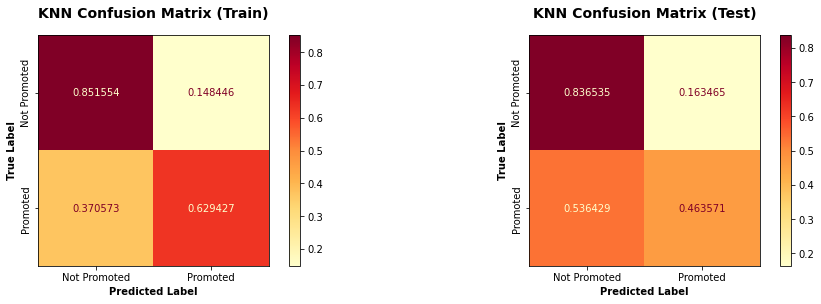


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.899220,0.768936
Base Random Forest SMOTE,0.942121,0.764139
Base Logistic Regression ROS,0.810626,0.805704
Base Logistic Regression SMOTE,0.810605,0.804885
Base KNN ROS,0.819776,0.718292


In [338]:
# Using oversampled data
KNN = KNeighborsClassifier().fit(X_train_ROS, y_train_ROS)
KNN_OStrainProbs = KNN.predict_proba(X_train_ROS)[:, 1]
KNN_OStestProbs = KNN.predict_proba(X_test)[:, 1]
plotConMat("KNN", KNN, X_train_ROS, X_test, y_train_ROS, y_test)

print("\nROC AUC score :")
baseModelScore.loc["Base KNN ROS"] = [roc_auc_score(y_train_ROS, KNN_OStrainProbs), roc_auc_score(y_test, KNN_OStestProbs)]
display(baseModelScore)

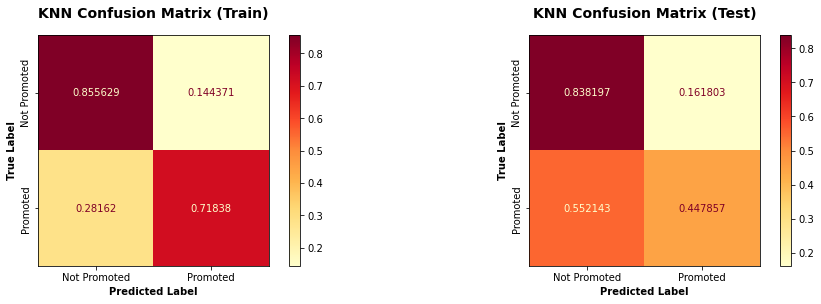


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.899220,0.768936
Base Random Forest SMOTE,0.942121,0.764139
Base Logistic Regression ROS,0.810626,0.805704
Base Logistic Regression SMOTE,0.810605,0.804885
Base KNN ROS,0.819776,0.718292
Base KNN SMOTE,0.875292,0.721158


In [339]:
# Using SMOTE data
KNN = KNeighborsClassifier().fit(X_train_SMOTE, y_train_SMOTE)
KNN_SMOTEtrainProbs = KNN.predict_proba(X_train_SMOTE)[:, 1]
KNN_SMOTEtestProbs = KNN.predict_proba(X_test)[:, 1]
plotConMat("KNN", KNN, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

print("\nROC AUC score :")
baseModelScore.loc["Base KNN SMOTE"] = [roc_auc_score(y_train_SMOTE, KNN_SMOTEtrainProbs), roc_auc_score(y_test, KNN_SMOTEtestProbs)]
display(baseModelScore)

Neither SMOTE nor ROS give good results. Its FN score is just unacceptable for us and thus we won't maximize this model.

### SVM Classifier

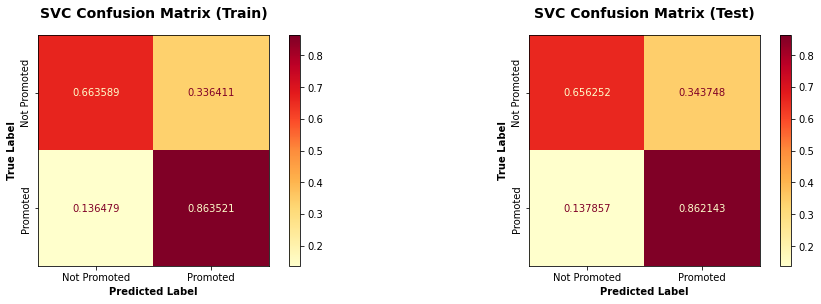


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.899220,0.768936
Base Random Forest SMOTE,0.942121,0.764139
Base Logistic Regression ROS,0.810626,0.805704
Base Logistic Regression SMOTE,0.810605,0.804885
Base KNN ROS,0.819776,0.718292
Base KNN SMOTE,0.875292,0.721158
Base SVC ROS,0.815585,0.810158


In [340]:
# Using oversampled data
SVM = SVC(probability = True).fit(X_train_ROS, y_train_ROS)
SVM_OStrainProbs = SVM.predict_proba(X_train_ROS)[:, 1]
SVM_OStestProbs = SVM.predict_proba(X_test)[:, 1]
plotConMat("SVC", SVM, X_train_ROS, X_test, y_train_ROS, y_test)

print("\nROC AUC score :")
baseModelScore.loc["Base SVC ROS"] = [roc_auc_score(y_train_ROS, SVM_OStrainProbs), roc_auc_score(y_test, SVM_OStestProbs)]
display(baseModelScore)

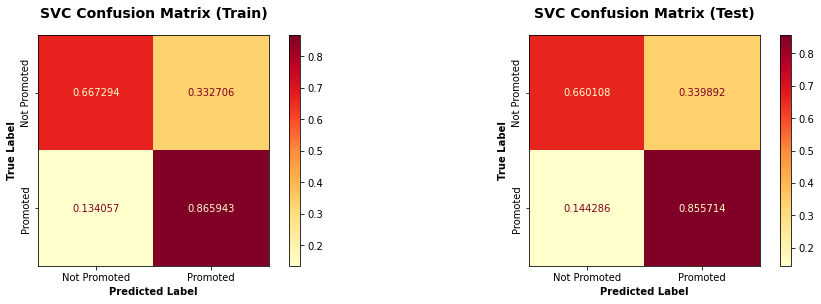


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.899220,0.768936
Base Random Forest SMOTE,0.942121,0.764139
Base Logistic Regression ROS,0.810626,0.805704
Base Logistic Regression SMOTE,0.810605,0.804885
Base KNN ROS,0.819776,0.718292
Base KNN SMOTE,0.875292,0.721158
Base SVC ROS,0.815585,0.810158
Base SVC SMOTE,0.824054,0.808048


In [341]:
# Using SMOTE data
SVM = SVC(probability = True).fit(X_train_SMOTE, y_train_SMOTE)
SVM_SMOTEtrainProbs = SVM.predict_proba(X_train_SMOTE)[:, 1]
SVM_SMOTEtestProbs = SVM.predict_proba(X_test)[:, 1]
plotConMat("SVC", SVM, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

print("\nROC AUC score :")
baseModelScore.loc["Base SVC SMOTE"] = [roc_auc_score(y_train_SMOTE, SVM_SMOTEtrainProbs), roc_auc_score(y_test, SVM_SMOTEtestProbs)]
display(baseModelScore)

Either ROS or SMOTE deliver the best model so far in predicting minority class (promoted employee). It has the lowest FN test percentage, but on the other hand has the highest FP. As a result, this model tends to centralized in minority. As stated before, we don't want a tendentious model. Hence this is not a good algorithm for us.

### XGB Classifier

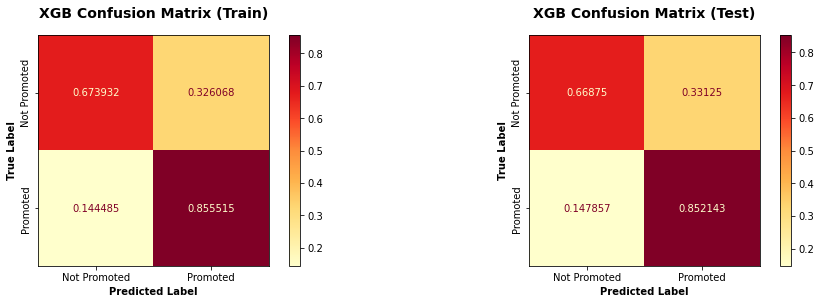


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.899220,0.768936
Base Random Forest SMOTE,0.942121,0.764139
Base Logistic Regression ROS,0.810626,0.805704
Base Logistic Regression SMOTE,0.810605,0.804885
Base KNN ROS,0.819776,0.718292
Base KNN SMOTE,0.875292,0.721158
Base SVC ROS,0.815585,0.810158
Base SVC SMOTE,0.824054,0.808048
Base XGB ROS,0.838651,0.829959


In [350]:
# Using oversampled data
XGB = XGBClassifier().fit(X_train_ROS, y_train_ROS)
XGB_OStrainProbs = XGB.predict_proba(X_train_ROS)[:, 1]
XGB_OStestProbs = XGB.predict_proba(X_test)[:, 1]
plotConMat("XGB", XGB, X_train_ROS, X_test, y_train_ROS, y_test)

print("\nROC AUC score :")
baseModelScore.loc["Base XGB ROS"] = [roc_auc_score(y_train_ROS, XGB_OStrainProbs), roc_auc_score(y_test, XGB_OStestProbs)]
display(baseModelScore)

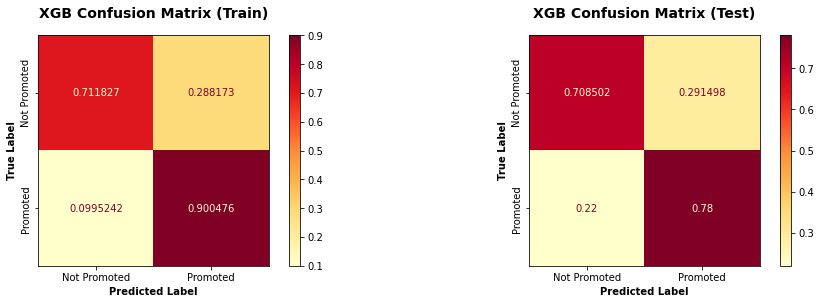


ROC AUC score :


,Train,Test
Base Random Forest ROS,0.899220,0.768936
Base Random Forest SMOTE,0.942121,0.764139
Base Logistic Regression ROS,0.810626,0.805704
Base Logistic Regression SMOTE,0.810605,0.804885
Base KNN ROS,0.819776,0.718292
Base KNN SMOTE,0.875292,0.721158
Base SVC ROS,0.815585,0.810158
Base SVC SMOTE,0.824054,0.808048
Base XGB ROS,0.838651,0.829959
Base XGB SMOTE,0.895496,0.823422


In [351]:
# Using SMOTE data
XGB = XGBClassifier().fit(X_train_SMOTE, y_train_SMOTE)
XGB_SMOTEtrainProbs = XGB.predict_proba(X_train_SMOTE)[:, 1]
XGB_SMOTEtestProbs = XGB.predict_proba(np.array(X_test))[:, 1]
plotConMat("XGB", XGB, X_train_SMOTE, np.array(X_test), y_train_SMOTE, y_test)

print("\nROC AUC score :")
baseModelScore.loc["Base XGB SMOTE"] = [roc_auc_score(y_train_SMOTE, XGB_SMOTEtrainProbs), roc_auc_score(y_test, XGB_SMOTEtestProbs)]
display(baseModelScore)

SMOTE is better than ROS for XGB. Even though RPS test score is higher, its test error rate isn't balanced. SMOTE on the other side, with just a slight difference in test score, provides more balanced error rate. The FP is decreases by 4% and FN increases by around 8%. Although the increment is quite high but at the same time it lowers the imbalanced error rate.

## Tuned Model
From all algorithms we have tried we will pick the top 3 potential models. Considering ROC AUC score, fit of train - test score, and also each confusion matrixs, we will tune and maximize **Random Forest**, **Logistic Regression**, and **XGBoost**.

Since these 3 models has **class_weight** parameter, we will try to handle imbalanced data using this last approach.

### Random Forest Classifier

**Class weight**

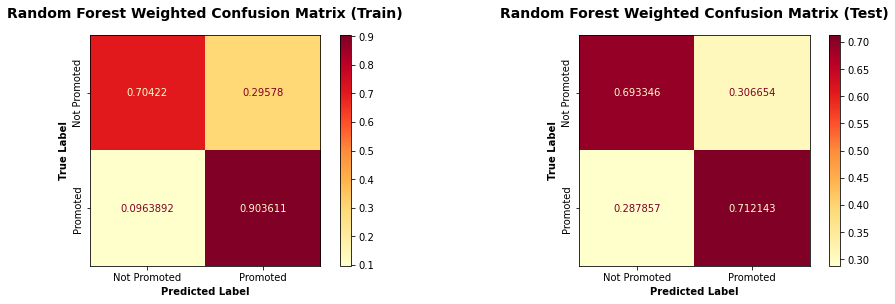


ROC AUC score :


,Train,Test
Random Forest Weighted,0.872302,0.754196


In [371]:
# Using class_weight parameter
RanFor = RandomForestClassifier(class_weight = {0 : .045, 1 : .955}, random_state = 7).fit(X_train, y_train)
RF_wtrainProbs = RanFor.predict_proba(X_train)[:, 1]
RF_wtestProbs = RanFor.predict_proba(X_test)[:, 1]
plotConMat("Random Forest Weighted", RanFor, X_train, X_test, y_train, y_test)

print("\nROC AUC score :")
tunedModelScore = pd.DataFrame({"Train" : roc_auc_score(y_train, RF_wtrainProbs), "Test" : roc_auc_score(y_test, RF_wtestProbs)}, index = ["Random Forest Weighted"])
display(tunedModelScore)

This the best weighted model we could get. Turns out it is worse than ROS. Hence we will stick with ROS for hyper parameter tuning.

**Hyper parameter tuning**

In [92]:
# RandomizedSearchCV
RanForTuned = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions = {
        "n_estimators" : [100, 200, 300, 400, 500, 600, 800, 900, 1000],
        "max_depth" : [None, 2, 5, 7, 9, 11, 15, 17, 20],
        "min_samples_split" : [2, 5, 10, 15, 25],
        "min_samples_leaf" : [2, 7, 5, 10, 11],
        "max_features" : ["auto", .3, .5, .7],
        "min_impurity_decrease" : [0, 0.5, 0.7, 0.9, 1],
        "random_state" : [7]
        }, cv = 3, n_jobs = -1, verbose = 1, n_iter = 40
    )

RanForTuned.fit(X_train_ROS, y_train_ROS)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 2, 5, 7, 9, 11, 15,
                                                      17, 20],
                                        'max_features': ['auto', 0.3, 0.5, 0.7],
                                        'min_impurity_decrease': [0, 0.5, 0.7,
                                                                  0.9, 1],
                                        'min_samples_leaf': [2, 7, 5, 10, 11],
                                        'min_samples_split': [2, 5, 10, 15, 25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 800, 900,
                                                         1000],
                                        'random_state': [7]},
                   verbose=1)

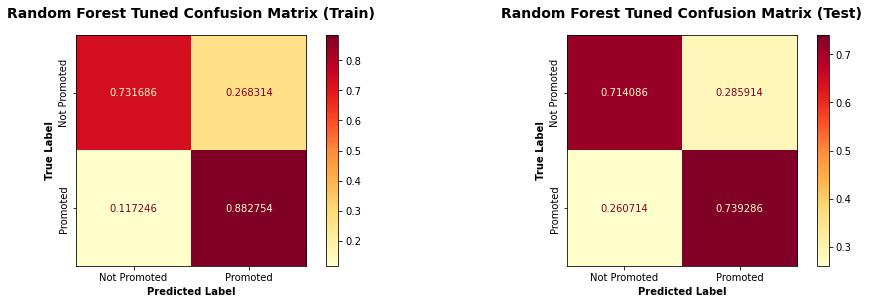

(0.8919457339989679, 0.8011432702443473)

In [93]:
# Tuned model
bestRanForTuned = RanForTuned.best_estimator_
RF_tunedtrainProbs = bestRanForTuned.predict_proba(X_train_ROS)[:, 1]
RF_tunedtestProbs = bestRanForTuned.predict_proba(X_test)[:, 1]
plotConMat("Random Forest Tuned", bestRanForTuned, X_train_ROS, X_test, y_train_ROS, y_test)

roc_auc_score(y_train_ROS, RF_tunedtrainProbs), roc_auc_score(y_test, RF_tunedtestProbs)

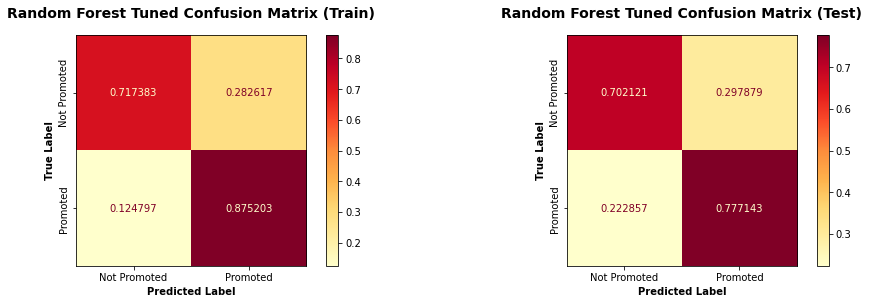


ROC AUC score :


,Train,Test
Random Forest Weighted,0.872302,0.754196
Random Forest Tuned,0.882514,0.812254


In [384]:
# Tuned model
bestRanForTuned = RanForTuned.best_estimator_
RF_tunedtrainProbs = bestRanForTuned.predict_proba(X_train_ROS)[:, 1]
RF_tunedtestProbs = bestRanForTuned.predict_proba(X_test)[:, 1]
plotConMat("Random Forest Tuned", bestRanForTuned, X_train_ROS, X_test, y_train_ROS, y_test)

print("\nROC AUC score :")
tunedModelScore.loc["Random Forest Tuned"] = [roc_auc_score(y_train_ROS, RF_tunedtrainProbs), roc_auc_score(y_test, RF_tunedtestProbs)]
display(tunedModelScore)

Test score increases significantly from ROS', which is 0.76. FN score decreases significantly too by 7%. FP scores on the other side only increases by about 2%. The tuned model also succeed to lower its difference in train and test score, hence make it more perfectly fit.

### Logistic Regression

**Class weight**

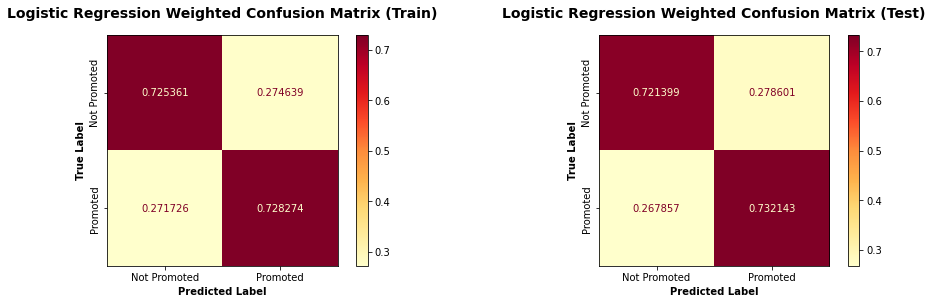

,Train,Test
Random Forest Weighted,0.872302,0.754196
Random Forest Tuned,0.882514,0.812254
Logistic Regression Weighted,0.809684,0.805407


In [69]:
# Using class_weight parameter
LogReg = LogisticRegression(class_weight = {0 : .085, 1 : .915}, random_state = 7).fit(X_train, y_train)
LG_wtrainProbs = LogReg.predict_proba(X_train)[:, 1]
LG_wtestProbs = LogReg.predict_proba(X_test)[:, 1]
plotConMat("Logistic Regression Weighted", LogReg, X_train, X_test, y_train, y_test)

print("\nROC AUC score :")
tunedModelScore.loc["Logistic Regression Weighted"] = [roc_auc_score(y_train, LG_wtrainProbs), roc_auc_score(y_test, LG_wtestProbs)]
display(tunedModelScore)

After many trials, we found that the best weight for each class is 0.085 for **not promoted** and 0.915 for **promoted**. But, this model still can't beat ROS'. The difference is very small, so there's no need to change ROS method to class weight. 

We will use polynomial features too to enhance model performance. Besides polynomial, we will apply scaling method too. Logistic Regression doesn't really need scaling because it won't effect the result. But, because we want to penalize the model in the next section we should scale the features, morover each feature have different value range (categorical and binary). 

In [418]:
# Polynomial with the best degree after many trials
X_train_ROS_poly = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(X_train_ROS)
X_test_poly = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(X_test)

In [419]:
# Scaling
XS_train_ROS_poly = MinMaxScaler().fit_transform(X_train_ROS_poly)
XS_test_poly = MinMaxScaler().fit_transform(X_test_poly)

**Hyper parameter tuning**

In [420]:
# RandomizedSearchCV
LogRegTuned = RandomizedSearchCV(
    estimator = LogisticRegression(),
    param_distributions = {
        "penalty" : ["l1", "l2", "elasticnet"],
        "random_state" : [7],
        "max_iter" : [100, 300, 500, 600, 250, 400, 550, 150],
        "C" : [0.1, 0.5, 0.7, 1, 1.3, 1.5, 1.8, 0.3, 2, 3, 5, 4],
        "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
        }, cv = 3, n_jobs = -1, verbose = 1, n_iter = 40
    )

LogRegTuned.fit(XS_train_ROS_poly, y_train_ROS)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 37.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.7, 1, 1.3, 1.5, 1.8,
                                              0.3, 2, 3, 5, 4],
                                        'max_iter': [100, 300, 500, 600, 250,
                                                     400, 550,

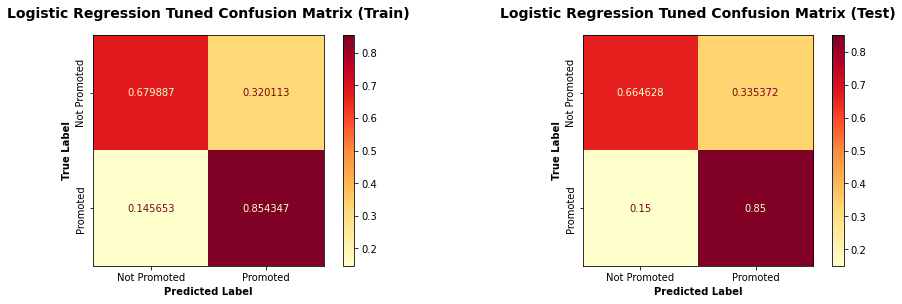


ROC AUC score :


,Train,Test
Random Forest Weighted,0.872302,0.754196
Random Forest Tuned,0.882514,0.812254
Logistic Regression Weighted,0.809684,0.805407
Logistic Regression Tuned,0.839480,0.822008


In [422]:
# Tuned model
bestLogRegTuned = LogRegTuned.best_estimator_
LG_tunedtrainProbs = bestLogRegTuned.predict_proba(XS_train_ROS_poly)[:, 1]
LG_tunedtestProbs = bestLogRegTuned.predict_proba(XS_test_poly)[:, 1]
plotConMat("Logistic Regression Tuned", bestLogRegTuned, XS_train_ROS_poly, XS_test_poly, y_train_ROS, y_test)

print("\nROC AUC score :")
tunedModelScore.loc["Logistic Regression Tuned"] = [roc_auc_score(y_train_ROS, LG_tunedtrainProbs), roc_auc_score(y_test, LG_tunedtestProbs)]
display(tunedModelScore)

The score is increasing 0.02 for both train and test. But unfortunately, good result in FN is not followed by FP. Although the model succeed to suppress FN rate, it has 6% higher than ROS. So, with respect to our goal and business consideration, this model is not good enough.

### XGB Classifier

Just like Logistic Regression, we can alter weight proportion between minority and majority class using **scale_pos_weight**. The normative and common formula for this parameter is **total negative targets / total positive target**.

**Weight ratio**

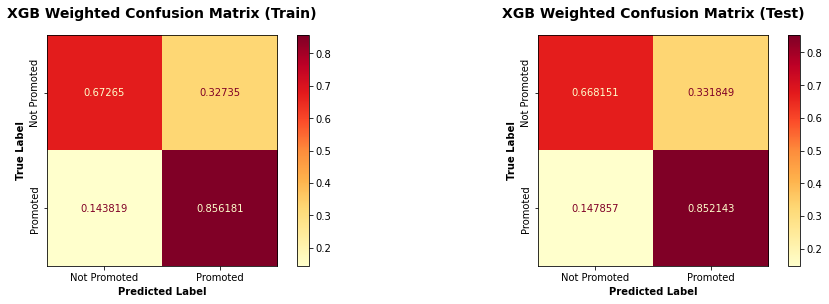


ROC AUC score :


,Train,Test
Random Forest Weighted,0.872302,0.754196
Random Forest Tuned,0.882514,0.812254
Logistic Regression Weighted,0.809684,0.805407
Logistic Regression Tuned,0.839480,0.822008
XGB Weighted,0.837337,0.829554


In [16]:
# Using scale_pos_weight parameter
XGB = XGBClassifier(scale_pos_weight = len(y[y == 0]) / len(y[y == 1]), random_state = 7).fit(X_train, y_train)
XGB_wtrainProbs = XGB.predict_proba(X_train)[:, 1]
XGB_wtestProbs = XGB.predict_proba(X_test)[:, 1]
plotConMat("XGB Weighted", XGB, X_train, X_test, y_train, y_test)

print("\nROC AUC score :")
tunedModelScore.loc["XGB Weighted"] = [roc_auc_score(y_train, XGB_wtrainProbs), roc_auc_score(y_test, XGB_wtestProbs)]
display(tunedModelScore)

Weighted class approach give us worse result than SMOTE's. FN score indeed decreases very significant by around 8%, but at the same time FP increases by 4%. We don't want this imbalanced error rate, moreover train score decreases from 0.89. Thus, we will stick to SMOTE.

**Hyper parameter tuning**

Just like Random Forest, XGB is a tree based algorithm and thus doesn't need and won't be affected by scaling.

In [24]:
# RandomizedSearchCV
XGBTuned = RandomizedSearchCV(
    estimator = XGBClassifier(),
    param_distributions = {
        "booster" : ["gbtree", "gblinear", "dart"],
        "max_depth" :  [3, 6, 9, 11, 15, 17],
        "learning_rate" : [.3, .5, .7, .9, .2, .8, .1],
        "n_estimators" : [100, 300, 400, 500, 700, 200, 150],
        "gamma" : [0, 0.3, 0.7, 1, 2, 5, 10],
        "colsample_bytree" : [.3, .5, .7, .9, 0.1, 0.6],
        "reg_alpha" : [0, .3, .5, .7, 1, 3, 5],
        "reg_lambda" : [.5, 1, .7, 0, .2, 3, 5],
        "random_state" : [7] 
    }, cv = 4, n_jobs = -1, verbose = 1, n_iter = 30
    )

XGBTuned.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 19.9min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'colsample_bytree': [0.3, 0.5, 0.7, 0.9,
                                                             0.1, 0.6],
                        

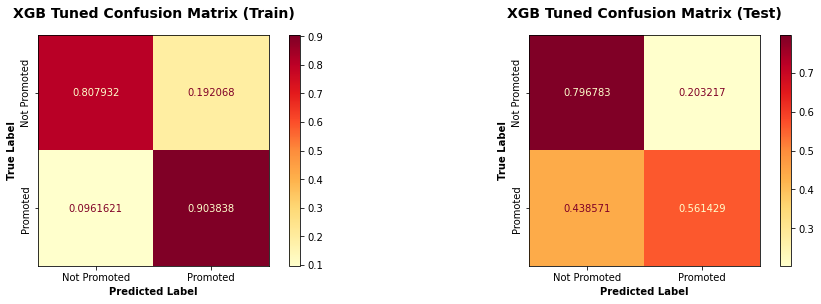


ROC AUC score :


,Train,Test
Random Forest Weighted,0.872302,0.754196
Random Forest Tuned,0.882514,0.812254
Logistic Regression Weighted,0.809684,0.805407
Logistic Regression Tuned,0.839480,0.822008
XGB Weighted,0.837337,0.829554
XGB Tuned,0.940445,0.772689


In [25]:
# Best model
bestXGBTuned = XGBTuned.best_estimator_
trainProbs = bestXGBTuned.predict_proba(X_train_SMOTE)[:, 1]
testProbs = bestXGBTuned.predict_proba(np.array(X_test))[:, 1]
plotConMat("XGB Tuned", bestXGBTuned, X_train_SMOTE, np.array(X_test), y_train_SMOTE, y_test)

print("\nROC AUC score :")
tunedModelScore.loc["XGB Tuned"] = [roc_auc_score(y_train_SMOTE, trainProbs), roc_auc_score(y_test, testProbs)]
display(tunedModelScore)

After several attempts, we got worse and very overfit model. Thus we will try to tune it manually and seek a better result.

**Tuning**

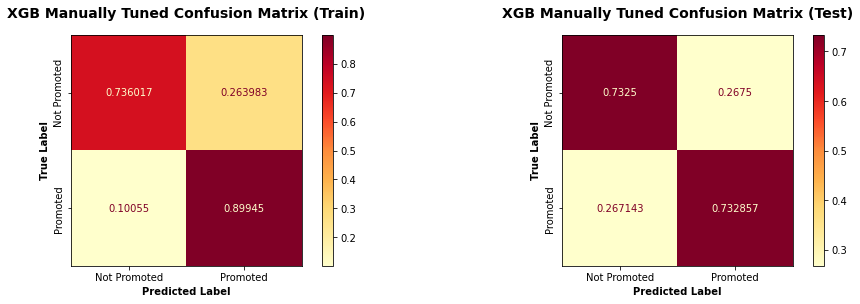


ROC AUC score :


,Train,Test
Random Forest Weighted,0.872302,0.754196
Random Forest Tuned,0.882514,0.812254
Logistic Regression Weighted,0.809684,0.805407
Logistic Regression Tuned,0.839480,0.822008
XGB Weighted,0.837337,0.829554
XGB Tuned,0.940445,0.772689
XGB Manually Tuned,0.909400,0.819215


In [64]:
# Manually adjust parameter
XGB_manual_tuned = XGBClassifier(
    max_depth = 8,
    learning_rate = 0.04,
    subsample = 0.8,
    colsample_bytree = 0.75,
    gamma = 5,
    n_estimator = 100,
    random_state = 7
).fit(X_train_SMOTE, y_train_SMOTE)

XGB_mtrainProbs = XGB_manual_tuned.predict_proba(X_train_SMOTE)[:, 1]
XGB_mtestProbs = XGB_manual_tuned.predict_proba(np.array(X_test))[:, 1]
plotConMat("XGB Manually Tuned", XGB_manual_tuned, X_train_SMOTE, np.array(X_test), y_train_SMOTE, y_test)

print("\nROC AUC score :")
tunedModelScore.loc["XGB Manually Tuned"] = [roc_auc_score(y_train_SMOTE, XGB_mtrainProbs), roc_auc_score(y_test, XGB_mtestProbs)]
display(tunedModelScore)

Although it's not the highest test score, this tuned XGB has the **lowest and balanced** error rate. The only algorithm standing behind it is weighted Logistic Regression. Their difference is very small, but XGB still dominate. The only drawback is this model quite overfit, while weighted Logistic Regression is more perfectly fit. However, for the sake of test score we, we pick this tuned XGB over Logistic Regression. 

## ROC Curve

After we tuned all posible models, we know that **tuned Logistic Regression**, **weighted XGB and SVC** are the best version of each algorithms.

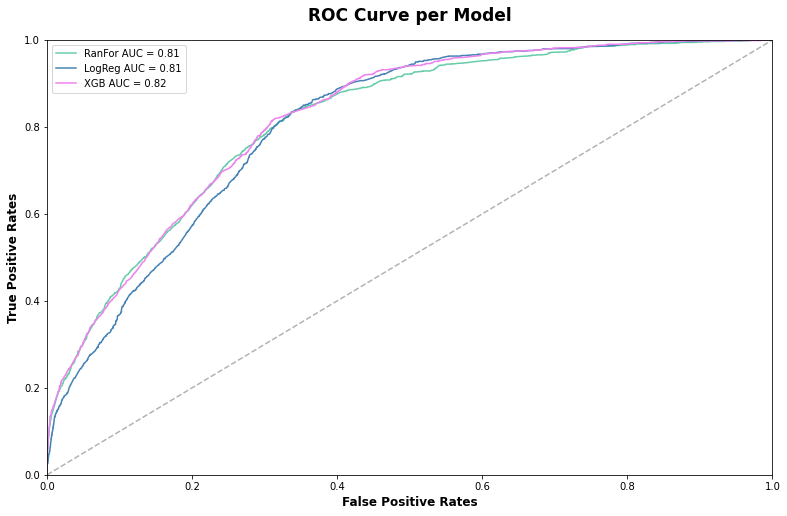

In [76]:
# FPR and TPR per model
RF_fpr, RF_tpr, RF_th = roc_curve(y_test, RF_tunedtestProbs)
LG_fpr, LG_tpr, LG_th = roc_curve(y_test, LG_wtestProbs)
XGB_fpr, XGB_tpr, XGB_th = roc_curve(y_test, XGB_mtestProbs)

# Plotting
plt.figure(figsize = (13, 8))
plt.plot(RF_fpr, RF_tpr, color = "mediumaquamarine", label = f"RanFor AUC = {round(auc(RF_fpr, RF_tpr), 2)}")
plt.plot(LG_fpr, LG_tpr, color = "steelblue", label = f"LogReg AUC = {round(auc(LG_fpr, LG_tpr), 2)}")
plt.plot(XGB_fpr, XGB_tpr, color = "violet", label = f"XGB AUC = {round(auc(XGB_fpr, XGB_tpr), 2)}")
plt.plot([0, 1], [0, 1], color = "grey", alpha = 0.6, ls = "--")
plt.title(
        "ROC Curve per Model", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "False Positive Rates",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.ylabel(
    "True Positive Rates",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.legend()

plt.show()

This is the final models result for our case. We can see that weighted XGBoost Classifier is the closest to 1 TPR (closer to upper left corner). Hence it has the widest are underneath, even the difference with other 2 is very small. The most important thing besides this score is our business consideration that lead to error rate configuration. So, across all trials, **tuned XGBoost Classifier** is the most proper model. 

In [77]:
# Exporting model
import joblib
joblib.dump(XGB_manual_tuned, "/content/drive/MyDrive/data/Final Project/bestModel")

['/content/drive/MyDrive/data/Final Project/bestModel']

# Conclusion - Recommendation

- Education has a linear correlation with promotion, except for Legal and Technology Department. Meanwhile, average training score and number of trainings has negative correlation and indicates how bad employee's performance is.
- Elders have lower chance compared to young - medium age. This phenomenon correlates with job level / position and length of service time.
- Previous year rating, winning awards, and KPI achievement are the most determinant considerations when promoting employees.
- Senior employees tend to have lower chance compared to freshers - medium employees. It is an impact of fewer level / job positions left on higher level. Old and senior employees are believed to most likely sit on high position, so the chance of going into next position is getting smaller. 
- The tuned XGB Classifier is good enough yet not truly maximized. There's plenty of rooms for improvement, especially on searching the best combination of **max_depth**, **n_estimator**, and **learning_rate**. 
- It is suggested to fix the XGB hyper parameter tuning method since it has many inappropriate input values. The best way is to reinput value near to what **manually tuned XGB** has, especially **learning_rate** and **gamma**.
- Other improvement that could be made is binning length of service with better range. A "Very Short" service range includes 1 and 8 years of service into one category. This is so not realistic since entry level have different experience, skill, and performance record than those who have worked for 5 - 8 years. Therefore, it is suggested to alter the range into 3 years since it's more acceptable and realistic. On many job site for example, often put 1 and 3 years experienced employee as a requirement for the same position.